<h1 align='center'> Housing Price Prediction

<i align='right'>This notebook was made by <br>Gopinath K S<br><br>
Linkedin - https://www.linkedin.com/in/gopinath-k-s-98a48a1b3/ <br>
Github - https://github.com/Gopinath-123   <br>
Kaggle - https://www.kaggle.com/gopinath15


</i>


This Notebook is made as a part for the Kaggle Competition on Advanced Housing Price Prediction.

This Dataset Containing more than 80 Features is Downloaded from Kaggle - https://www.kaggle.com/c/house-prices-advanced-regression-techniques


In [1]:
#importing the nesserssary libraries
#! pip install xgboost
#! pip install mlxtend
#! pip install lightgbm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#setting display options
pd.pandas.set_option('display.max_columns',None)


In [2]:
train_df=pd.read_csv('house_train.csv')
test_df=pd.read_csv('house_test.csv')


In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Getting the shape of training and test data

In [5]:
train_df.shape

(1460, 81)

In [6]:
test_df.shape

(1459, 80)

Let us first find the missing values in both train and test datasets

In [7]:
#no. of missing values in training dataset
pd.Series(train_df.isnull().sum(),index=train_df.columns[train_df.isnull().sum()>1])


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
#no. of missing values in test dataset
pd.Series(test_df.isnull().sum(),index=test_df.columns[test_df.isnull().sum()>1])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
dtype: int64

For This Notebook I have taken the
  - train_df - Training dataset
  - test_df - test dataset
  - combined_df - train and test dataset merged (done for making changes to both train and test datasets at the same time.)<br>



Here we observe that Training and test dataset are Deviated in terms of missing values. Features Like 'MSZoning' ,'Utilities' do not have missing values in training data but have missing values in test data. So while handling missing values and encoding we have to consider both the train and test data together to get a balanced dataset.

In [9]:
combined_df= pd.concat([train_df,test_df],ignore_index=True)

In [10]:
combined_df



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,

#### Percentage of null values in each feature

In [11]:
for i in combined_df.columns:
    print(i,"---->",combined_df[i].isnull().sum()*100/len(combined_df[i]))


Id ----> 0.0
MSSubClass ----> 0.0
MSZoning ----> 0.1370332305584104
LotFrontage ----> 16.649537512846866
LotArea ----> 0.0
Street ----> 0.0
Alley ----> 93.21685508735868
LotShape ----> 0.0
LandContour ----> 0.0
Utilities ----> 0.0685166152792052
LotConfig ----> 0.0
LandSlope ----> 0.0
Neighborhood ----> 0.0
Condition1 ----> 0.0
Condition2 ----> 0.0
BldgType ----> 0.0
HouseStyle ----> 0.0
OverallQual ----> 0.0
OverallCond ----> 0.0
YearBuilt ----> 0.0
YearRemodAdd ----> 0.0
RoofStyle ----> 0.0
RoofMatl ----> 0.0
Exterior1st ----> 0.0342583076396026
Exterior2nd ----> 0.0342583076396026
MasVnrType ----> 0.8221993833504625
MasVnrArea ----> 0.7879410757108599
ExterQual ----> 0.0
ExterCond ----> 0.0
Foundation ----> 0.0
BsmtQual ----> 2.774922918807811
BsmtCond ----> 2.8091812264474134
BsmtExposure ----> 2.8091812264474134
BsmtFinType1 ----> 2.7064063035286057
BsmtFinSF1 ----> 0.0342583076396026
BsmtFinType2 ----> 2.7406646111682083
BsmtFinSF2 ----> 0.0342583076396026
BsmtUnfSF ----> 0.03425

Here we have "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature" features with more than half of the data missing so we can skip these features

In [12]:
combined_df.drop(['Alley',"FireplaceQu", "PoolQC", "Fence", "MiscFeature"],axis=1,inplace=True)
train_df.drop(['Alley',"FireplaceQu", "PoolQC", "Fence", "MiscFeature"],axis=1,inplace=True)
test_df.drop(['Alley',"FireplaceQu", "PoolQC", "Fence", "MiscFeature"],axis=1,inplace=True)


#### let us Explore the Train and test datas seperately

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [14]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Seperating out the categorical feature and numerical feature
Cat_fea contains categorical feature names<br>
num_fea contains numerical feature names

In [15]:
cat_fea=[]
num_fea=[]
for i,j in zip(train_df.dtypes,train_df.columns):
    if i=='object':
        cat_fea.append(j)
    else:
        num_fea.append(j)

In [16]:
df=train_df.copy()

df=df[cat_fea+['SalePrice']]

#### Working with Categorical Features

Checking whether missing values in feature contribute to predict the target

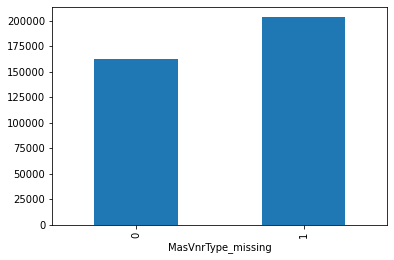

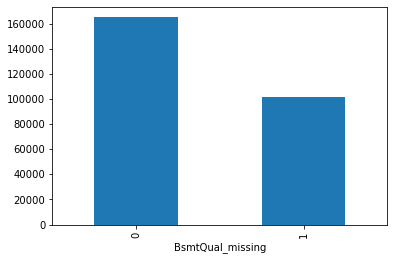

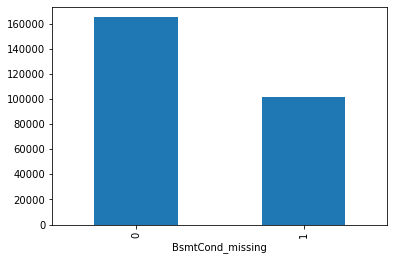

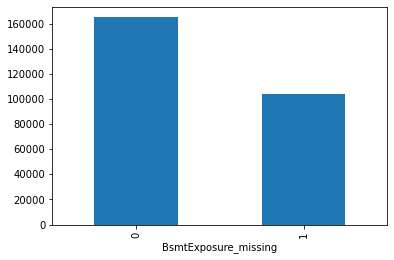

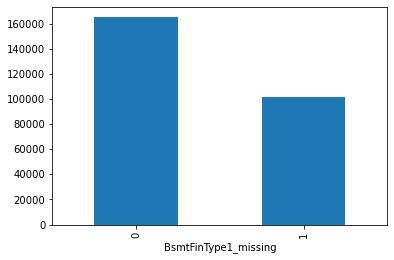

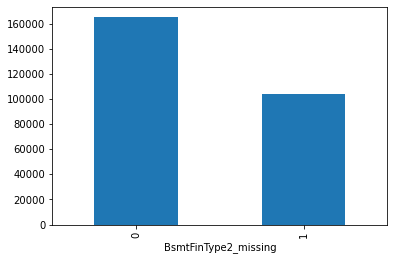

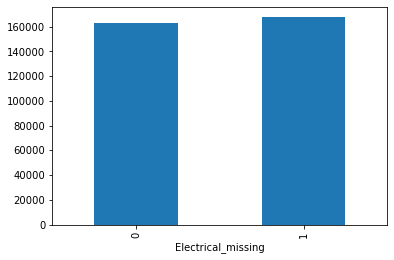

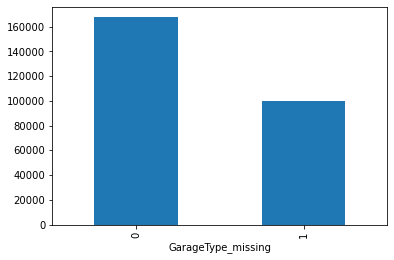

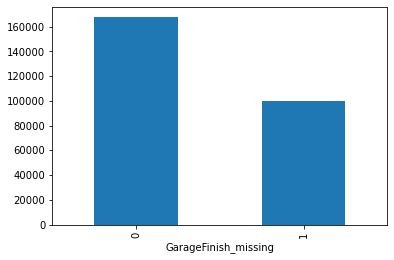

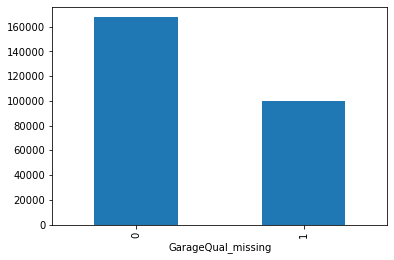

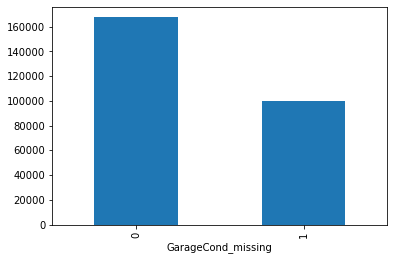

In [17]:

#df=df[cat_fea].fillna('missing')
for i in df.columns[df.isnull().sum()>0]:
    
    df[i+'_missing']=np.where(df[i].isnull(),1,0)
    df.groupby(i+'_missing')['SalePrice'].median().plot.bar()
    plt.show()


So the Median value differs between missing datasets in features - "MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType","GarageFinish","GarageQual","GarageCond" <br>
So we can Use then in test data also

In [18]:
categories_to_null=["MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType","GarageFinish","GarageQual","GarageCond"]
for i in categories_to_null:
    combined_df[i+"_missing"]=np.where(combined_df[i].isnull(),1,0)

Replacing the missing values with mode


In [19]:
df=train_df.copy()

df=df[cat_fea+['SalePrice']]
for i in cat_fea:
    x=df[i].mode()[0]
    df[i].fillna(x,inplace=True)

In [20]:
#replacing the missing categories with mode
for i in cat_fea:
    combined_df[i]=combined_df[i].fillna(combined_df[i].mode()[0])

    

In [21]:
print(combined_df[cat_fea].isnull().sum().to_list())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Analyzing the categorical Features

Calculating and visualizing the median of housePrice for each categories of a categorical Feature

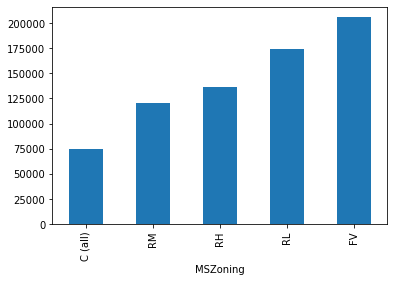

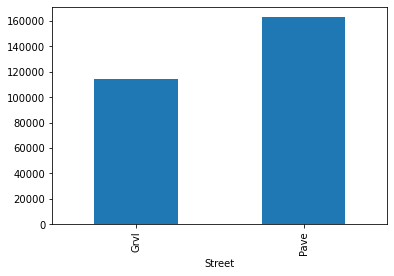

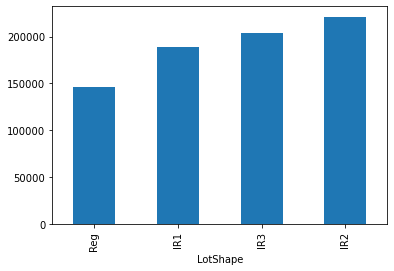

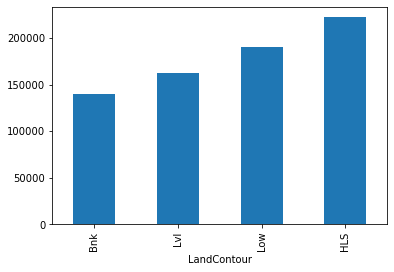

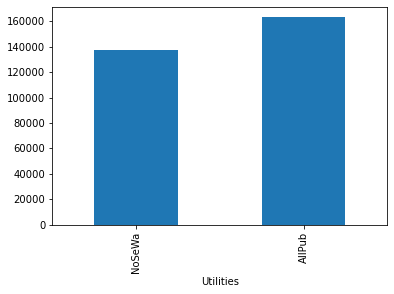

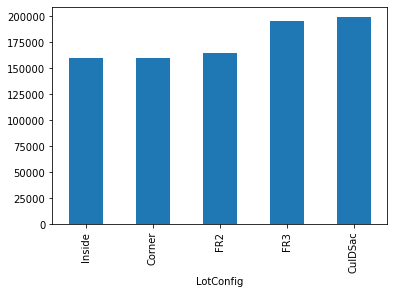

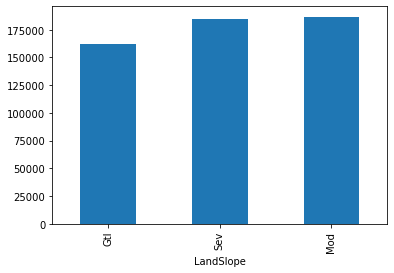

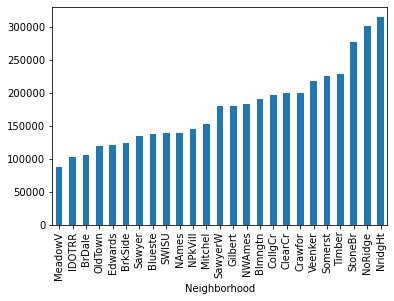

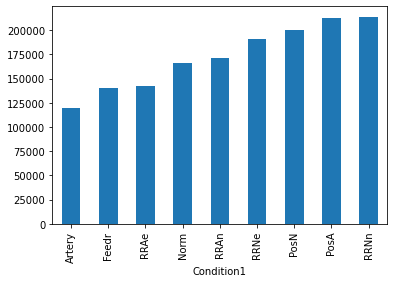

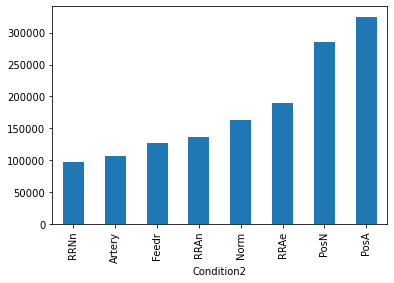

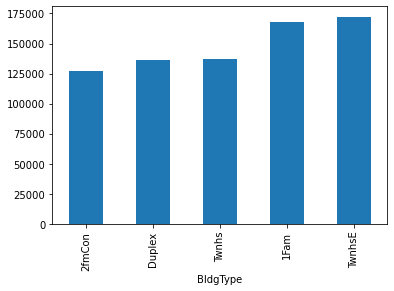

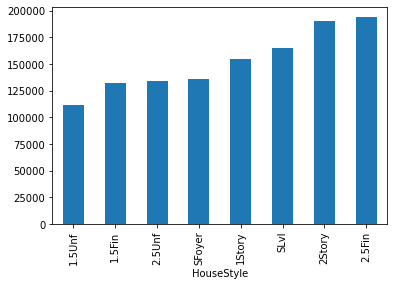

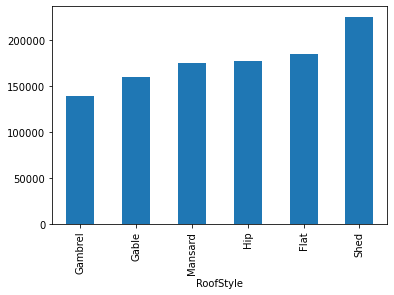

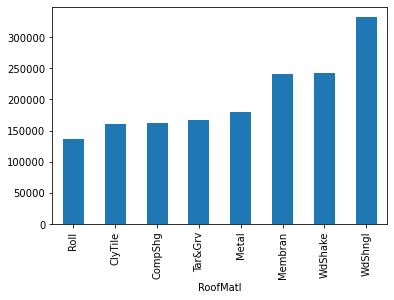

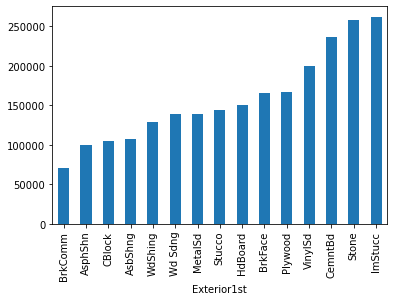

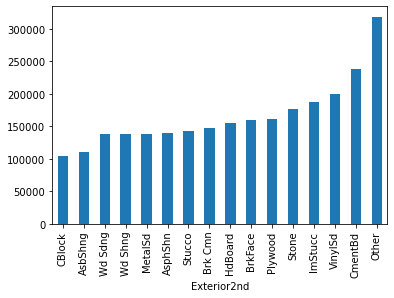

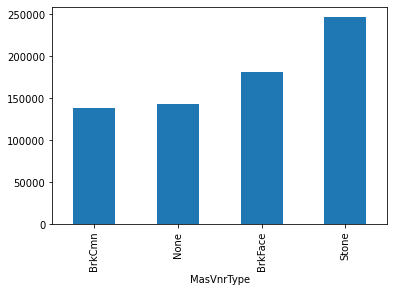

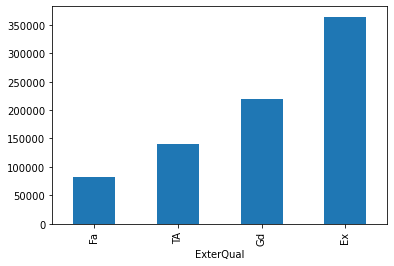

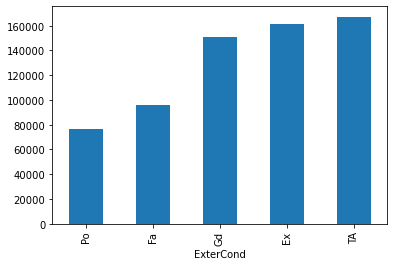

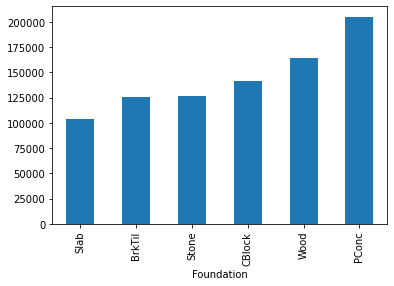

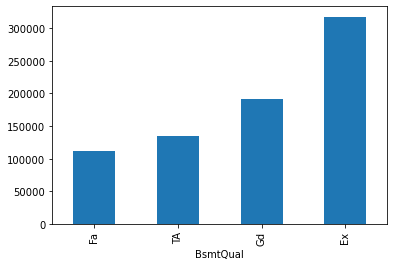

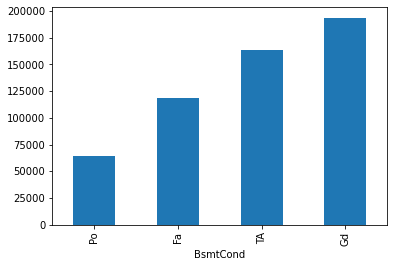

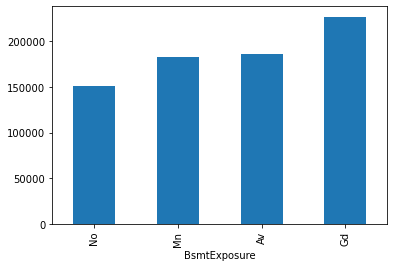

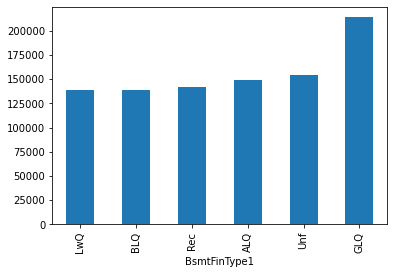

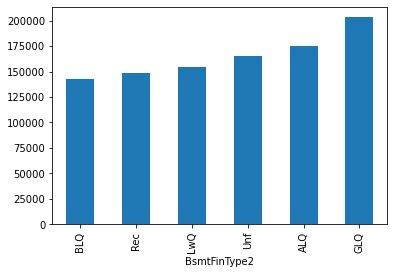

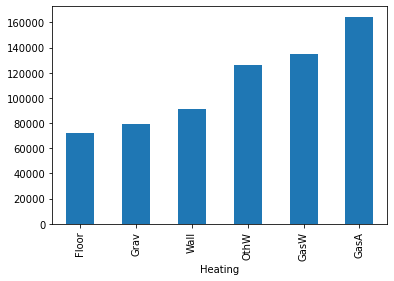

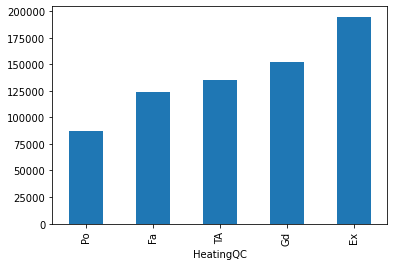

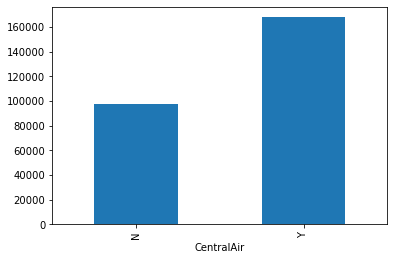

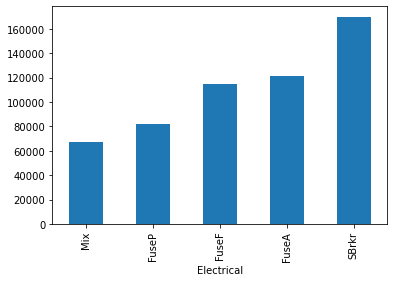

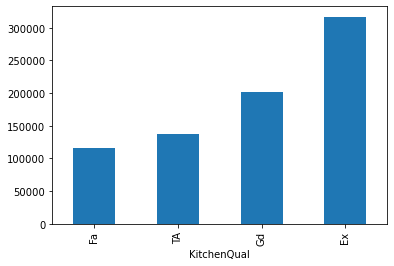

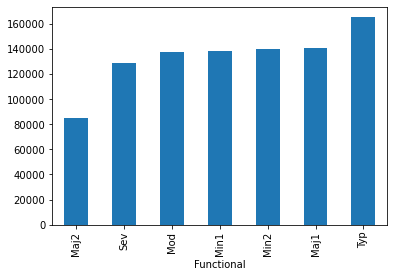

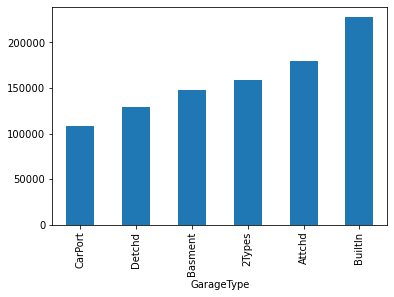

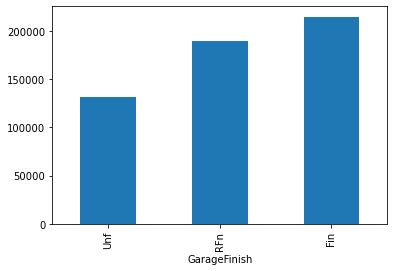

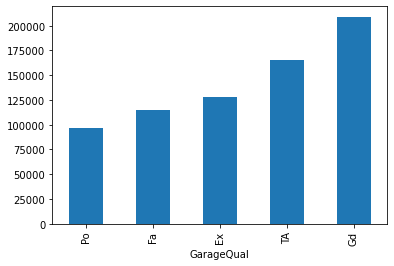

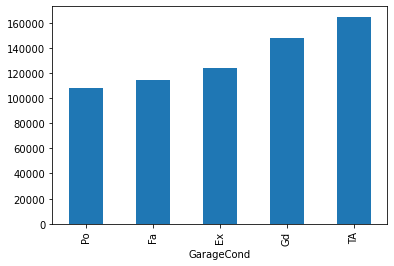

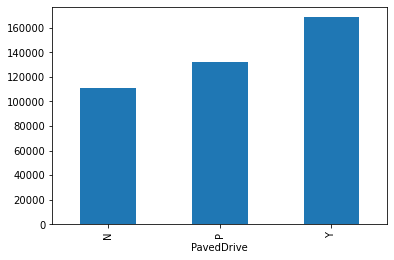

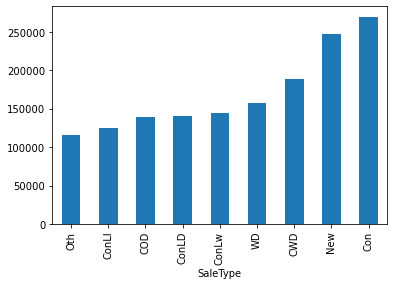

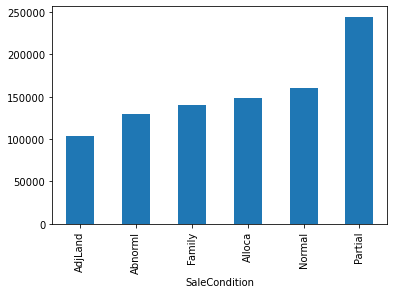

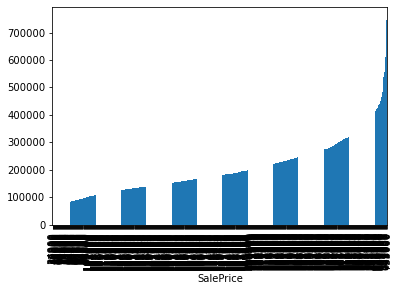

In [22]:
#plotting the categories with median of the category
for i in df.columns:
    df.groupby(i)['SalePrice'].median().sort_values().plot.bar()
    plt.show()

On visualizing, we found These Features Contribute to the target<br>


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'Condition1', 'Exterior1st', 'MasVnrType', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive']

So we could Encode them Directly

In [24]:
# converting the categorical values

fea_code=pd.Series([1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0]).map({1:True,0:False})
fea_code=df.columns[fea_code]

In [25]:
#encoding values in combined_df 
for i in fea_code:
    x=df.groupby(i)['SalePrice'].median().sort_values().index.to_list()
    for j in range(len(x)):
        combined_df[i]=combined_df[i].replace(x[j],j)
    combined_df[i]=combined_df[i].astype(int)

In [26]:
#encoding values in train_df
for i in fea_code:
    x=df.groupby(i)['SalePrice'].median().sort_values().index.to_list()
    for j in range(len(x)):
        df[i]=df[i].replace(x[j],j)
    df[i]=df[i].astype(int)
    
        

In [122]:
df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,0,1,1,0,0,5,3,2,1,3,1,1,11,3,2,2,4,4,2,2,0,3,3,5,4,1,5,2,2,4,1,3,4,2,2,1,208500
1,3,1,0,1,1,0,0,6,1,2,1,2,1,1,6,1,1,1,4,2,2,2,3,1,3,5,4,1,5,1,2,4,1,3,4,2,2,1,181500
2,3,1,1,1,1,0,0,5,3,2,1,3,1,1,11,3,2,2,4,4,2,2,1,3,3,5,4,1,5,2,2,4,1,3,4,2,2,1,223500
3,3,1,1,1,1,0,0,5,3,2,1,3,1,1,5,1,1,1,4,1,1,3,0,1,3,5,3,1,5,2,2,1,0,3,4,2,2,1,140000
4,3,1,1,1,1,0,0,8,3,2,1,3,1,1,11,3,2,2,4,4,2,2,2,3,3,5,4,1,5,2,2,4,1,3,4,2,2,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,0,1,1,0,0,4,3,2,1,3,1,1,11,3,1,1,4,4,2,2,0,1,3,5,4,1,5,1,2,4,1,3,4,2,2,1,175000
1456,3,1,0,1,1,0,0,4,3,2,1,2,1,1,10,2,3,1,4,2,2,2,0,1,1,5,2,1,5,1,1,4,0,3,4,2,2,1,210000
1457,3,1,0,1,1,0,0,5,3,2,1,3,1,1,12,4,1,3,2,1,1,3,0,3,3,5,4,1,5,2,2,4,1,3,4,2,2,1,266500
1458,3,1,0,1,1,0,0,3,3,2,1,2,1,1,6,1,1,1,4,2,1,2,1,3,1,5,3,1,3,2,2,4,0,3,4,2,2,1,142125


<p>The Below features are kind of Special features that are encoded manually. Categories in a Feature having similar median for Target-SalePrice are grouped to a single categories ,so that we could reduce the number of categories in a feature.
This method was purely based on Trial and Error to Group Categories.
</p>




This code just replaces the several categories in the Feature to minimum no. of Categories

In [28]:
##Transforming the columns of our choice with weights for training data
df['LotConfig']=df['LotConfig'].replace(df.groupby('LotConfig')['SalePrice'].median().sort_values().index.to_list(),[0,0,0,1,1])

df['LandSlope']=df['LandSlope'].replace(df.groupby('LandSlope')['SalePrice'].median().sort_values().index.to_list(),[0,1,1])

df['Neighborhood']=df['Neighborhood'].replace(df.groupby('Neighborhood')['SalePrice'].median().sort_values().index.to_list(),[0,1,1,2,2,2,3,3,3,3,3,3,4,4,4,5,5,5,5,6,6,6,8,8,8])

df['Condition2']=df['Condition2'].replace(df.groupby('Condition2')['SalePrice'].median().sort_values().index.to_list(),[0,0,1,1,2,2,4,4])

df['BldgType']=df['BldgType'].replace(df.groupby('BldgType')['SalePrice'].median().sort_values().index.to_list(),[0,0,0,1,1])

df['HouseStyle']=df['HouseStyle'].replace(df.groupby('HouseStyle')['SalePrice'].median().sort_values().index.to_list(),[0,1,1,1,2,2,3,3])

df['RoofStyle']=df['RoofStyle'].replace(df.groupby('RoofStyle')['SalePrice'].median().sort_values().index.to_list(),[0,1,1,1,1,2])

df['RoofMatl']=df['RoofMatl'].replace(df.groupby('RoofMatl')['SalePrice'].median().sort_values().index.to_list(),[0,1,1,1,1,1,2,4])

df['Exterior2nd']=df['Exterior2nd'].replace(df.groupby('Exterior2nd')['SalePrice'].median().sort_values().index.to_list(),[0,0,1,1,1,1,1,1,2,2,2,3,3,3,4,6])

df['Foundation']=df['Foundation'].replace(df.groupby('Foundation')['SalePrice'].median().sort_values().index.to_list(),[0,1,1,2,3,4])

df['BsmtFinType1']=df['BsmtFinType1'].replace(df.groupby('BsmtFinType1')['SalePrice'].median().sort_values().index.to_list(),[0,0,0,1,1,3])

df['Electrical']=df['Electrical'].replace(df.groupby('Electrical')['SalePrice'].median().sort_values().index.to_list(),[0,1,2,3,5])

df['Functional']=df['Functional'].replace(df.groupby('Functional')['SalePrice'].median().sort_values().index.to_list(),[0,1,1,1,1,1,2])

df['SaleType']=df['SaleType'].replace(df.groupby('SaleType')['SalePrice'].median().sort_values().index.to_list(),[0,0,1,1,1,2,3,4,5])

df['SaleCondition']=df['SaleCondition'].replace(df.groupby('SaleCondition')['SalePrice'].median().sort_values().index.to_list(),[0,1,1,1,1,2])











Doing the same for combined_df

In [29]:
combined_df['LotConfig']=combined_df['LotConfig'].replace(combined_df.groupby('LotConfig')['SalePrice'].median().sort_values().index.to_list(),[0,0,0,1,1])

combined_df['LandSlope']=combined_df['LandSlope'].replace(combined_df.groupby('LandSlope')['SalePrice'].median().sort_values().index.to_list(),[0,1,1])

combined_df['Neighborhood']=combined_df['Neighborhood'].replace(combined_df.groupby('Neighborhood')['SalePrice'].median().sort_values().index.to_list(),[0,1,1,2,2,2,3,3,3,3,3,3,4,4,4,5,5,5,5,6,6,6,8,8,8])

combined_df['Condition2']=combined_df['Condition2'].replace(combined_df.groupby('Condition2')['SalePrice'].median().sort_values().index.to_list(),[0,0,1,1,2,2,4,4])

combined_df['BldgType']=combined_df['BldgType'].replace(combined_df.groupby('BldgType')['SalePrice'].median().sort_values().index.to_list(),[0,0,0,1,1])

combined_df['HouseStyle']=combined_df['HouseStyle'].replace(combined_df.groupby('HouseStyle')['SalePrice'].median().sort_values().index.to_list(),[0,1,1,1,2,2,3,3])

combined_df['RoofStyle']=combined_df['RoofStyle'].replace(combined_df.groupby('RoofStyle')['SalePrice'].median().sort_values().index.to_list(),[0,1,1,1,1,2])

combined_df['RoofMatl']=combined_df['RoofMatl'].replace(combined_df.groupby('RoofMatl')['SalePrice'].median().sort_values().index.to_list(),[0,1,1,1,1,1,2,4])

combined_df['Exterior2nd']=combined_df['Exterior2nd'].replace(combined_df.groupby('Exterior2nd')['SalePrice'].median().sort_values().index.to_list(),[0,0,1,1,1,1,1,1,2,2,2,3,3,3,4,6])

combined_df['Foundation']=combined_df['Foundation'].replace(combined_df.groupby('Foundation')['SalePrice'].median().sort_values().index.to_list(),[0,1,1,2,3,4])

combined_df['BsmtFinType1']=combined_df['BsmtFinType1'].replace(combined_df.groupby('BsmtFinType1')['SalePrice'].median().sort_values().index.to_list(),[0,0,0,1,1,3])

combined_df['Electrical']=combined_df['Electrical'].replace(combined_df.groupby('Electrical')['SalePrice'].median().sort_values().index.to_list(),[0,1,2,3,5])

combined_df['Functional']=combined_df['Functional'].replace(combined_df.groupby('Functional')['SalePrice'].median().sort_values().index.to_list(),[0,1,1,1,1,1,2])

combined_df['SaleType']=combined_df['SaleType'].replace(combined_df.groupby('SaleType')['SalePrice'].median().sort_values().index.to_list(),[0,0,1,1,1,2,3,4,5])

combined_df['SaleCondition']=combined_df['SaleCondition'].replace(combined_df.groupby('SaleCondition')['SalePrice'].median().sort_values().index.to_list(),[0,1,1,1,1,2])


In [ ]:
df

Converting the Column type of encoded columns to int

In [30]:
#changing the datatype of the columns to int
fea_code_rev=pd.Series([1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0]).map({0:True,1:False})
fea_code_rev=df.columns[fea_code_rev]
for i in fea_code_rev:
    if i !='SalePrice':
        df[i]=df[i].astype(int)
        combined_df[i]=combined_df[i].astype(int)

In [31]:
#now the columns are converted to integers
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 86 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2919 non-null   int64  
 1   MSSubClass            2919 non-null   int64  
 2   MSZoning              2919 non-null   int32  
 3   LotFrontage           2433 non-null   float64
 4   LotArea               2919 non-null   int64  
 5   Street                2919 non-null   int32  
 6   LotShape              2919 non-null   int32  
 7   LandContour           2919 non-null   int32  
 8   Utilities             2919 non-null   int32  
 9   LotConfig             2919 non-null   int32  
 10  LandSlope             2919 non-null   int32  
 11  Neighborhood          2919 non-null   int32  
 12  Condition1            2919 non-null   int32  
 13  Condition2            2919 non-null   int32  
 14  BldgType              2919 non-null   int32  
 15  HouseStyle           

In [32]:
combined_df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVnrType_missing,BsmtQual_missing,BsmtCond_missing,BsmtExposure_missing,BsmtFinType1_missing,BsmtFinType2_missing,GarageType_missing,GarageFinish_missing,GarageQual_missing,GarageCond_missing
0,1,60,3,65.0,8450,1,0,1,1,0,0,5,3,2,1,3,7,5,2003,2003,1,1,11,3,2,196.0,2,4,4,2,2,0,3,706.0,3,0.0,150.0,856.0,5,4,1,5,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,2,0,4,2003.0,1,2.0,548.0,3,4,2,0,61,0,0,0,0,0,2,2008,2,1,208500.0,0,0,0,0,0,0,0,0,0,0
1,2,20,3,80.0,9600,1,0,1,1,0,0,6,1,2,1,2,6,8,1976,1976,1,1,6,1,1,0.0,1,4,2,2,2,3,1,978.0,3,0.0,284.0,1262.0,5,4,1,5,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,2,1,4,1976.0,1,2.0,460.0,3,4,2,298,0,0,0,0,0,0,5,2007,2,1,181500.0,0,0,0,0,0,0,0,0,0,0
2,3,60,3,68.0,11250,1,1,1,1,0,0,5,3,2,1,3,7,5,2001,2002,1,1,11,3,2,162.0,2,4,4,2,2,1,3,486.0,3,0.0,434.0,920.0,5,4,1,5,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,2,1,4,2001.0,1,2.0,608.0,3,4,2,0,42,0,0,0,0,0,9,2008,2,1,223500.0,0,0,0,0,0,0,0,0,0,0
3,4,70,3,60.0,9550,1,1,1,1,0,0,5,3,2,1,3,7,5,1915,1970,1,1,5,1,1,0.0,1,4,1,1,3,0,1,216.0,3,0.0,540.0,756.0,5,3,1,5,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,2,1,1,1998.0,0,3.0,642.0,3,4,2,0,35,272,0,0,0,0,2,2006,2,1,140000.0,0,0,0,0,0,0,0,0,0,0
4,5,60,3,84.0,14260,1,1,1,1,0,0,8,3,2,1,3,8,5,2000,2000,1,1,11,3,2,350.0,2,4,4,2,2,2,3,655.0,3,0.0,490.0,1145.0,5,4,1,5,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,2,1,4,2000.0,1,3.0,836.0,3,4,2,192,84,0,0,0,0,0,12,2008,2,1,250000.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,1,21.0,1936,1,0,1,1,0,0,0,3,2,0,3,4,7,1970,1970,1,1,12,4,1,0.0,1,4,2,1,2,0,1,0.0,3,0.0,546.0,546.0,5,3,1,5,546,546,0,1092,0.0,0.0,1,1,3,1,1,5,2,0,4,NaN,0,0.0,0.0,3,4,2,0,0,0,0,0,0,0,6,2006,2,1,NaN,0,0,0,0,0,0,1,1,1,1
2915,2916,160,1,21.0,1894,1,0,1,1,0,0,0,3,2,1,3,4,5,1970,1970,1,1,12,4,1,0.0,1,4,2,1,2,0,0,252.0,3,0.0,294.0,546.0,5,2,1,5,546,546,0,1092,0.0,0.0,1,1,3,1,1,6,2,0,0,1970.0,0,1.0,286.0,3,4,2,0,24,0,0,0,0,0,4,2006,2,1,NaN,0,0,0,0,0,0,0,0,0,0
2916,2917,20,3,160.0,20000,1,0,1,1,0,0,3,3,2,1,2,5,7,1960,1996,1,1,11,3,1,0.0,1,4,2,1,2,0,1,1224.0,3,0.0,0.0,1224.0,5,4,1,5,1224,0,0,1224,1.0,0.0,1,0,4,1,1,7,2,1,1,1960.0,0,2.0,576.0,3,4,2,474,0,0,0,0,0,0,9,2006,2,1,NaN,0,0,0,0,0,0,0,0,0,0
2917,2918,85,3,62.0,10441,1,0,1,1,0,0,3,3,2,1,1,5,5,1992,1992,1,1,8,1,1,0.0,1,4,4,2,2,2,3,337.0,3,0.0,575.0,912.0,5,2,1,5,970,0,0,970,0.0,1.0,1,0,3,1,1,6,2,0,4,NaN,0,0.0,0.0,3,4,2,80,32,0,0,0,0,700,7,2006,2,1,NaN,0,0,0,0,0,0,1,1,1,1


### Till now we have cleaned the object type features . Now lets get into Numerical Features

In [33]:
# the numerical features are num_fea
df_num=train_df[num_fea]
df_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


#### Corelation 

In [34]:
df_num.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

#### we could see 4 features associated with years
Lets create new features with the features associated with years

In [35]:
year_fea=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','SalePrice']
df_yr=df_num[year_fea].copy()

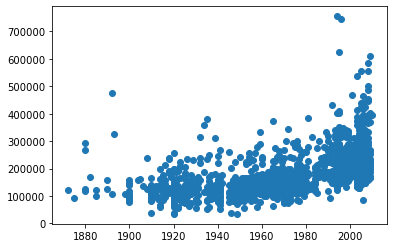

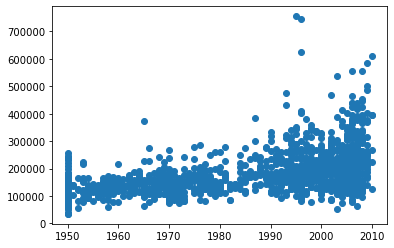

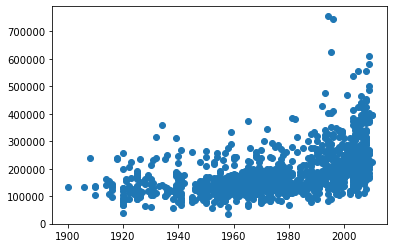

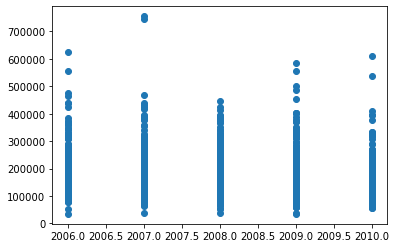

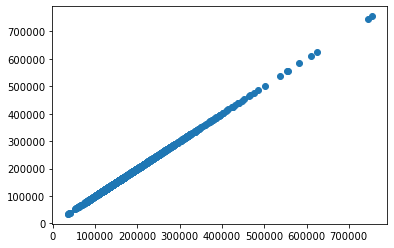

In [36]:
for i in year_fea:
    plt.scatter(df_num[i],df_num['SalePrice'])
    plt.show()

#### Finding the age of the house and other properties
Creating new features that tell us the no.of years between house built and sold.

In [37]:
for i in year_fea:
    df_yr[i+'_age']= df_yr['YrSold'] - df_yr[i]


We could Find that Newly created features are more corelated than old features

In [38]:
df_yr.corr()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age,SalePrice_age
YearBuilt,1.000000,0.592855,0.825667,-0.013618,0.522897,-0.999036,-0.593868,-0.824793,NaN,-0.522897
YearRemodAdd,0.592855,1.000000,0.642277,0.035743,0.507101,-0.590360,-0.997930,-0.639163,NaN,-0.507100
GarageYrBlt,0.825667,0.642277,1.000000,-0.001014,0.486362,-0.824615,-0.642652,-0.998552,NaN,-0.486361
YrSold,-0.013618,0.035743,-0.001014,1.000000,-0.028923,0.057500,0.028592,0.054809,NaN,0.028939
SalePrice,0.522897,0.507101,0.486362,-0.028923,1.000000,-0.523350,-0.509079,-0.487069,NaN,-1.000000
YearBuilt_age,-0.999036,-0.590360,-0.824615,0.057500,-0.523350,1.000000,0.594195,0.826174,NaN,0.523351
YearRemodAdd_age,-0.593868,-0.997930,-0.642652,0.028592,-0.509079,0.594195,1.000000,0.643039,NaN,0.509079
GarageYrBlt_age,-0.824793,-0.639163,-0.998552,0.054809,-0.487069,0.826174,0.643039,1.000000,NaN,0.487069
YrSold_age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice_age,-0.522897,-0.507100,-0.486361,0.028939,-1.000000,0.523351,0.509079,0.487069,NaN,1.000000


In [39]:
df_yr

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age,SalePrice_age
0,2003,2003,2003.0,2008,208500,5,5,5.0,0,-206492
1,1976,1976,1976.0,2007,181500,31,31,31.0,0,-179493
2,2001,2002,2001.0,2008,223500,7,6,7.0,0,-221492
3,1915,1970,1998.0,2006,140000,91,36,8.0,0,-137994
4,2000,2000,2000.0,2008,250000,8,8,8.0,0,-247992
...,...,...,...,...,...,...,...,...,...,...
1455,1999,2000,1999.0,2007,175000,8,7,8.0,0,-172993
1456,1978,1988,1978.0,2010,210000,32,22,32.0,0,-207990
1457,1941,2006,1941.0,2010,266500,69,4,69.0,0,-264490
1458,1950,1996,1950.0,2010,142125,60,14,60.0,0,-140115


#### Working with garages creating new feature

In [40]:
df_num['GarageYrBlt'].isnull().sum()

81

In [41]:
df_num[['GarageCars','GarageArea']][df_num['GarageYrBlt'].isnull()]

,GarageCars,GarageArea
39,0,0
48,0,0
78,0,0
88,0,0
89,0,0
...,...,...
1349,0,0
1407,0,0
1449,0,0
1450,0,0


This feature tells whether garage is present or not

In [42]:
df_yr['garage']=np.where(df_yr['GarageYrBlt'].isnull(),1,0)

<AxesSubplot:xlabel='garage'>

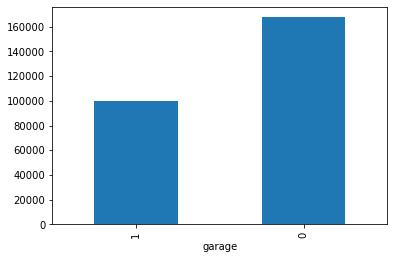

In [43]:
df_yr.groupby('garage')['SalePrice'].median().sort_values().plot.bar()

We could clearly see the price of houses with garages is higher than those without


In [44]:
#adding new feature to combined_df
combined_df['garage']=np.where(combined_df['GarageYrBlt'].isnull(),1,0)

In [45]:
#GarageYrBlt alone has null values
combined_df['GarageYrBlt'].fillna(combined_df['GarageYrBlt'].mean(),inplace=True)


In [46]:
for i in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    combined_df[i+'_age']= combined_df['YrSold'] - combined_df[i]
combined_df['YearRemodAdd_age']=combined_df['YearRemodAdd_age'].replace(-1,0)

In [47]:
old_combined=combined_df
combined_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVnrType_missing,BsmtQual_missing,BsmtCond_missing,BsmtExposure_missing,BsmtFinType1_missing,BsmtFinType2_missing,GarageType_missing,GarageFinish_missing,GarageQual_missing,GarageCond_missing,garage,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age
0,1,60,3,65.0,8450,1,0,1,1,0,0,5,3,2,1,3,7,5,2003,2003,1,1,11,3,2,196.0,2,4,4,2,2,0,3,706.0,3,0.0,150.0,856.0,5,4,1,5,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,2,0,4,2003.000000,1,2.0,548.0,3,4,2,0,61,0,0,0,0,0,2,2008,2,1,208500.0,0,0,0,0,0,0,0,0,0,0,0,5,5,5.000000
1,2,20,3,80.0,9600,1,0,1,1,0,0,6,1,2,1,2,6,8,1976,1976,1,1,6,1,1,0.0,1,4,2,2,2,3,1,978.0,3,0.0,284.0,1262.0,5,4,1,5,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,2,1,4,1976.000000,1,2.0,460.0,3,4,2,298,0,0,0,0,0,0,5,2007,2,1,181500.0,0,0,0,0,0,0,0,0,0,0,0,31,31,31.000000
2,3,60,3,68.0,11250,1,1,1,1,0,0,5,3,2,1,3,7,5,2001,2002,1,1,11,3,2,162.0,2,4,4,2,2,1,3,486.0,3,0.0,434.0,920.0,5,4,1,5,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,2,1,4,2001.000000,1,2.0,608.0,3,4,2,0,42,0,0,0,0,0,9,2008,2,1,223500.0,0,0,0,0,0,0,0,0,0,0,0,7,6,7.000000
3,4,70,3,60.0,9550,1,1,1,1,0,0,5,3,2,1,3,7,5,1915,1970,1,1,5,1,1,0.0,1,4,1,1,3,0,1,216.0,3,0.0,540.0,756.0,5,3,1,5,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,2,1,1,1998.000000,0,3.0,642.0,3,4,2,0,35,272,0,0,0,0,2,2006,2,1,140000.0,0,0,0,0,0,0,0,0,0,0,0,91,36,8.000000
4,5,60,3,84.0,14260,1,1,1,1,0,0,8,3,2,1,3,8,5,2000,2000,1,1,11,3,2,350.0,2,4,4,2,2,2,3,655.0,3,0.0,490.0,1145.0,5,4,1,5,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,2,1,4,2000.000000,1,3.0,836.0,3,4,2,192,84,0,0,0,0,0,12,2008,2,1,250000.0,0,0,0,0,0,0,0,0,0,0,0,8,8,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,1,21.0,1936,1,0,1,1,0,0,0,3,2,0,3,4,7,1970,1970,1,1,12,4,1,0.0,1,4,2,1,2,0,1,0.0,3,0.0,546.0,546.0,5,3,1,5,546,546,0,1092,0.0,0.0,1,1,3,1,1,5,2,0,4,1978.113406,0,0.0,0.0,3,4,2,0,0,0,0,0,0,0,6,2006,2,1,NaN,0,0,0,0,0,0,1,1,1,1,1,36,36,27.886594
2915,2916,160,1,21.0,1894,1,0,1,1,0,0,0,3,2,1,3,4,5,1970,1970,1,1,12,4,1,0.0,1,4,2,1,2,0,0,252.0,3,0.0,294.0,546.0,5,2,1,5,546,546,0,1092,0.0,0.0,1,1,3,1,1,6,2,0,0,1970.000000,0,1.0,286.0,3,4,2,0,24,0,0,0,0,0,4,2006,2,1,NaN,0,0,0,0,0,0,0,0,0,0,0,36,36,36.000000
2916,2917,20,3,160.0,20000,1,0,1,1,0,0,3,3,2,1,2,5,7,1960,1996,1,1,11,3,1,0.0,1,4,2,1,2,0,1,1224.0,3,0.0,0.0,1224.0,5,4,1,5,1224,0,0,1224,1.0,0.0,1,0,4,1,1,7,2,1,1,1960.000000,0,2.0,576.0,3,4,2,474,0,0,0,0,0,0,9,2006,2,1,NaN,0,0,0,0,0,0,0,0,0,0,0,46,10,46.000000
2917,2918,85,3,62.0,10441,1,0,1,1,0,0,3,3,2,1,1,5,5,1992,1992,1,1,8,1,1,0.0,1,4,4,2,2,2,3,337.0,3,0.0,575.0,912.0,5,2,1,5,970,0,0,970,0.0,1.0,1,0,3,1,1,6,2,0,4,1978.113406,0,0.0,0.0,3,4,2,80,32,0,0,0,0,700,7,2006,2,1,NaN,0,0,0,0,0,0,1,1,1,1,1,14,14,27.886594


Now we have done with years lets remove it

In [48]:
df_num=df_num.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)

Let us get the discrete and continuous variables

In [49]:
for i in df_num.columns:
    print(i,'----->',len(df_num[i].unique()))

Id -----> 1460
MSSubClass -----> 15
LotFrontage -----> 111
LotArea -----> 1073
OverallQual -----> 10
OverallCond -----> 9
MasVnrArea -----> 328
BsmtFinSF1 -----> 637
BsmtFinSF2 -----> 144
BsmtUnfSF -----> 780
TotalBsmtSF -----> 721
1stFlrSF -----> 753
2ndFlrSF -----> 417
LowQualFinSF -----> 24
GrLivArea -----> 861
BsmtFullBath -----> 4
BsmtHalfBath -----> 3
FullBath -----> 4
HalfBath -----> 3
BedroomAbvGr -----> 8
KitchenAbvGr -----> 4
TotRmsAbvGrd -----> 12
Fireplaces -----> 4
GarageCars -----> 5
GarageArea -----> 441
WoodDeckSF -----> 274
OpenPorchSF -----> 202
EnclosedPorch -----> 120
3SsnPorch -----> 20
ScreenPorch -----> 76
PoolArea -----> 8
MiscVal -----> 21
MoSold -----> 12
SalePrice -----> 663


In [50]:
#seperating out the features based on no of unique values they have
disc_fea=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold']
spl_fea=['LowQualFinSF','3SsnPorch','PoolArea']
cont_fea=[i for i in df_num.columns if i not in disc_fea and i not in spl_fea]

Considering the special categories <br>
These features have 90% same category but the remaining 10% is spread out in different categories<br>
Converting them into categorical

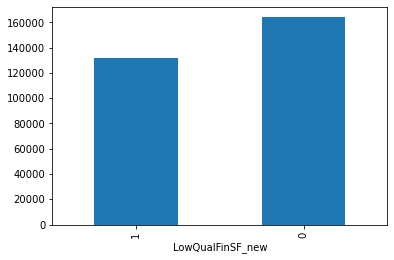

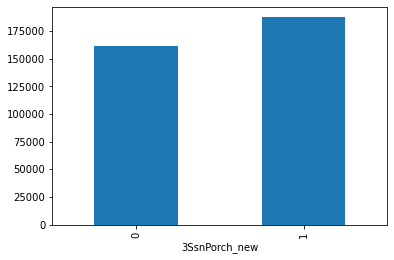

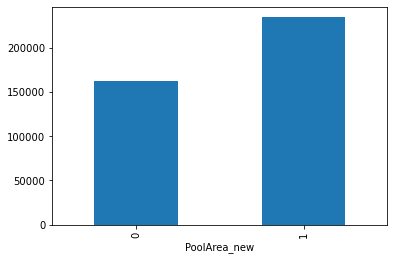

In [51]:
df_spl=df_num.copy()
for i in spl_fea:
    df_spl[i+'_new']=np.where(df_spl[i]>0,1,0)
    df_spl.groupby(i+'_new')['SalePrice'].median().sort_values().plot.bar()
    plt.show()

In [52]:
combined_df[spl_fea].isnull().sum()
for i in spl_fea:
    combined_df[i+'_new']=np.where(combined_df[i]>0,1,0)

### Considering the discrete Features

Discrete Features are numerical but have distinct values (not continuous)

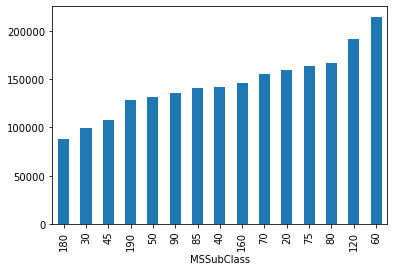

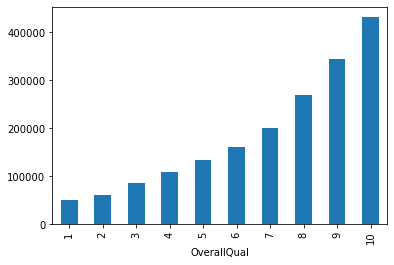

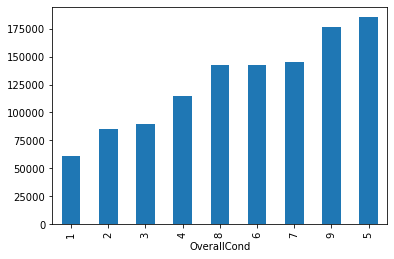

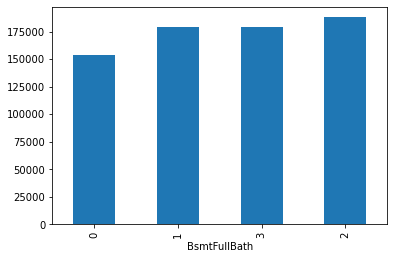

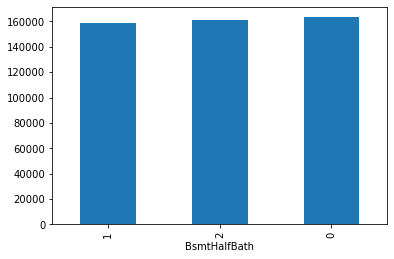

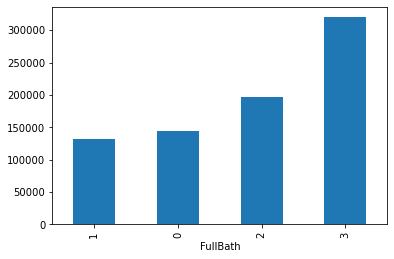

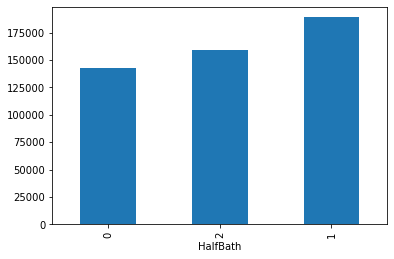

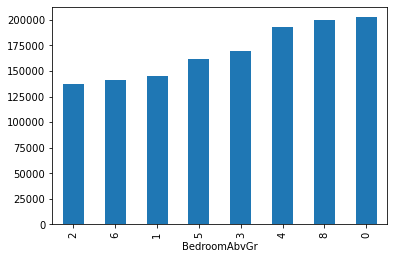

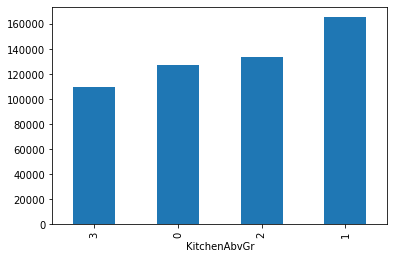

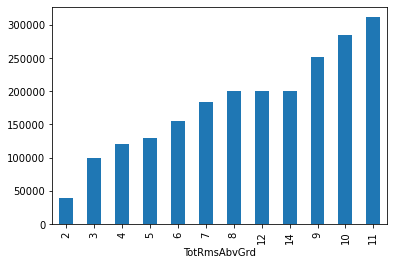

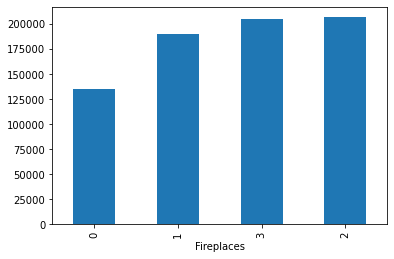

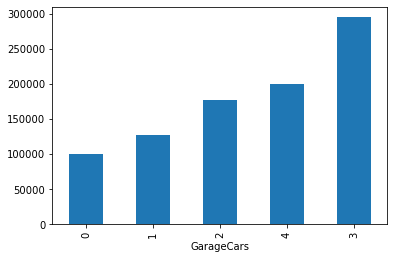

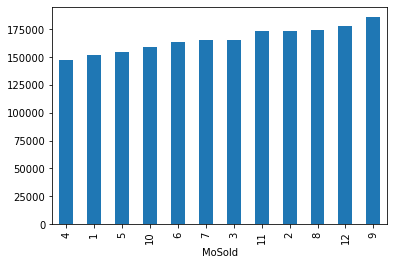

In [53]:
for i in disc_fea:
    df_num.groupby(i)['SalePrice'].median().sort_values().plot.bar()
    plt.show()

Considering the batroom Feature

<AxesSubplot:xlabel='bathroom'>

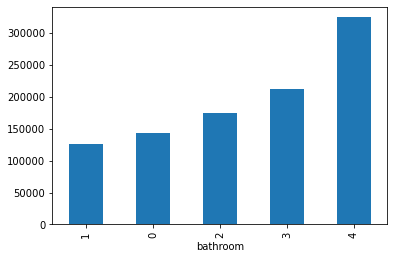

In [54]:
#bathroom
bath_fea=['FullBath','HalfBath']
df_spl['bathroom']=df_spl[bath_fea].sum(axis=1)
df_spl.groupby('bathroom')['SalePrice'].median().sort_values().plot.bar()

In [55]:
combined_df['bathroom']=combined_df[bath_fea].sum(axis=1)

In [56]:
df_num[disc_fea+['SalePrice']].corr()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,SalePrice
MSSubClass,1.000000,0.032628,-0.059316,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.013585,-0.084284
OverallQual,0.032628,1.000000,-0.091932,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.070815,0.790982
OverallCond,-0.059316,-0.091932,1.000000,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.003511,-0.077856
BsmtFullBath,0.003491,0.111098,-0.054942,1.000000,-0.147871,-0.064512,-0.030905,-0.150673,-0.041503,-0.053275,0.137928,0.131881,-0.025361,0.227122
BsmtHalfBath,-0.002333,-0.040150,0.117821,-0.147871,1.000000,-0.054536,-0.012340,0.046519,-0.037944,-0.023836,0.028976,-0.020891,0.032873,-0.016844
FullBath,0.131608,0.550600,-0.194149,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.469672,0.055872,0.560664
HalfBath,0.177354,0.273458,-0.060769,-0.030905,-0.012340,0.136381,1.000000,0.226651,-0.068263,0.343415,0.203649,0.219178,-0.009050,0.284108
BedroomAbvGr,-0.023438,0.101676,0.012980,-0.150673,0.046519,0.363252,0.226651,1.000000,0.198597,0.676620,0.107570,0.086106,0.046544,0.168213
KitchenAbvGr,0.281721,-0.183882,-0.087001,-0.041503,-0.037944,0.133115,-0.068263,0.198597,1.000000,0.256045,-0.123936,-0.050634,0.026589,-0.135907
TotRmsAbvGrd,0.040380,0.427452,-0.057583,-0.053275,-0.023836,0.554784,0.343415,0.676620,0.256045,1.000000,0.326114,0.362289,0.036907,0.533723


From the above analysis we drop
- 'BsmtFullBath','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','MoSold'

In [57]:
fea_todrop=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','MoSold']
fea_toalter=['MSSubClass','bathroom','OverallCond']

In [58]:
df_disc=df_num[disc_fea+['SalePrice']]
df_disc

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,SalePrice
0,60,7,5,1,0,2,1,3,1,8,0,2,2,208500
1,20,6,8,0,1,2,0,3,1,6,1,2,5,181500
2,60,7,5,1,0,2,1,3,1,6,1,2,9,223500
3,70,7,5,1,0,1,0,3,1,7,1,3,2,140000
4,60,8,5,1,0,2,1,4,1,9,1,3,12,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,2,1,3,1,7,1,2,8,175000
1456,20,6,6,1,0,2,0,3,1,7,2,2,2,210000
1457,70,7,9,0,0,2,0,4,1,9,2,1,5,266500
1458,20,5,6,1,0,1,0,2,1,5,0,1,4,142125


In [59]:
#dropping the unwanted features
df_disc=df_disc.drop(fea_todrop,axis=1)
combined_df=combined_df.drop(fea_todrop,axis=1)

In [60]:
#features to change
combined_df['bathroom']=combined_df['bathroom'].replace({0:1,1:0})

df_disc['MSSubClass']=df_disc['MSSubClass'].replace(df_disc.groupby('MSSubClass')['SalePrice'].median().sort_values().index.to_list(),[0,1,2,3,4,5,6,6,7,8,9,10,11,12,13])
df_disc['OverallCond']=df_disc['OverallCond'].replace({8:5,9:8,5:9})


In [61]:

combined_df['MSSubClass']=combined_df['MSSubClass'].replace(combined_df.groupby('MSSubClass')['SalePrice'].median().sort_values().index.to_list(),[0,1,2,3,4,5,6,6,7,8,9,10,11,12,13,0])
combined_df['OverallCond']=combined_df['OverallCond'].replace({8:5,9:8,5:9})





In [62]:
combined_df[df_disc.columns].isnull().sum()

MSSubClass         0
OverallQual        0
OverallCond        0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         1
SalePrice       1459
dtype: int64

In [63]:
combined_df['GarageCars']=combined_df['GarageCars'].fillna(combined_df['GarageCars'].mode()[0])

## Getting into Continuous numerical value

In [64]:
df_cont=train_df[cont_fea].copy()
cont_fea

['Id',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

Droping index as it has no use

In [65]:
df_cont.drop('Id',axis=1,inplace=True)
combined_df.drop('Id',axis=1,inplace=True)
cont_fea=cont_fea[1:]

#### Corelation of Each Feature with SalePrice

In [66]:
df_cont.corr()['SalePrice']

LotFrontage      0.351799
LotArea          0.263843
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
GrLivArea        0.708624
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
ScreenPorch      0.111447
MiscVal         -0.021190
SalePrice        1.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

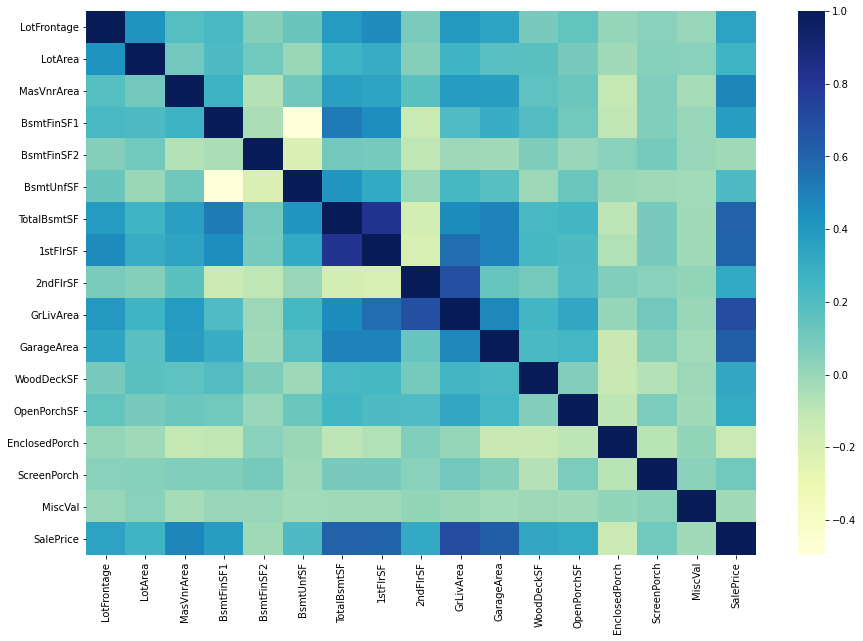

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cont.corr(),cmap="YlGnBu")

In [68]:
df_cont.isnull().sum()

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
MiscVal            0
SalePrice          0
dtype: int64

Filling the missing value with median

In [69]:
df_cont['LotFrontage']=df_cont['LotFrontage'].fillna(df_cont['LotFrontage'].median())

#### Univariate Analysis of Contiuous variable

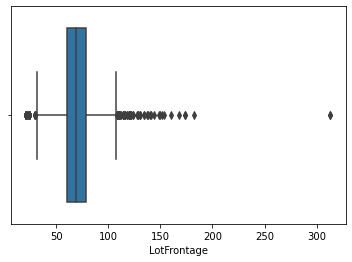

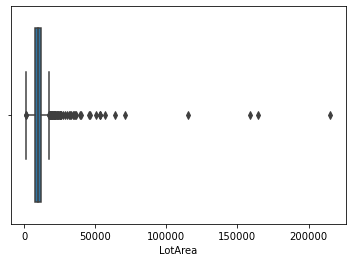

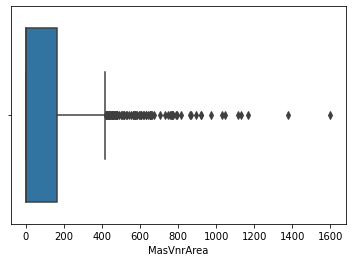

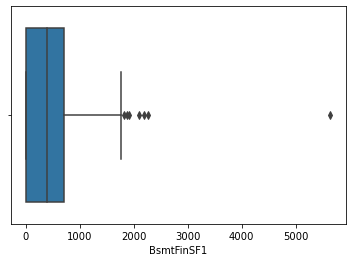

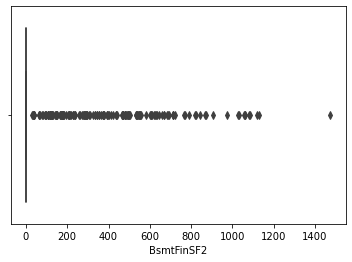

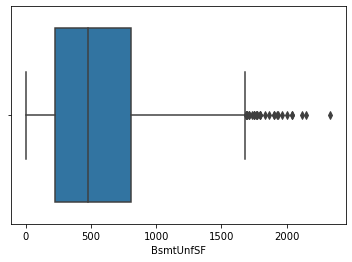

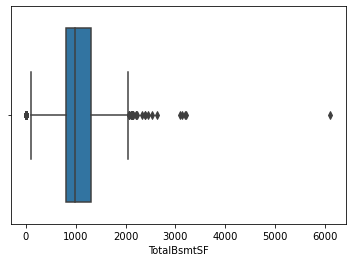

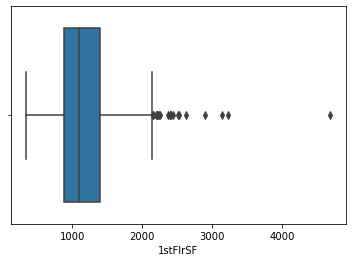

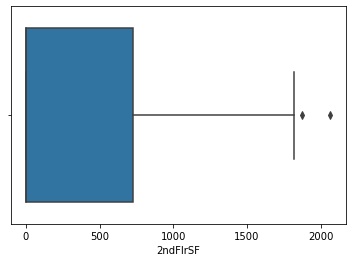

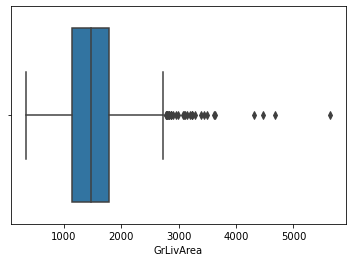

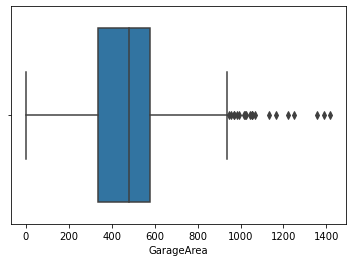

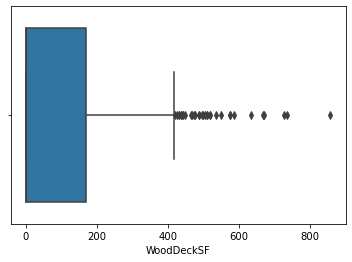

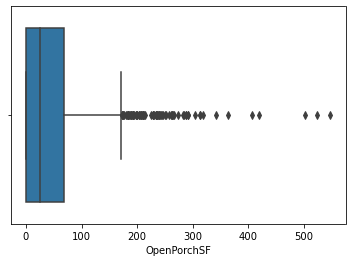

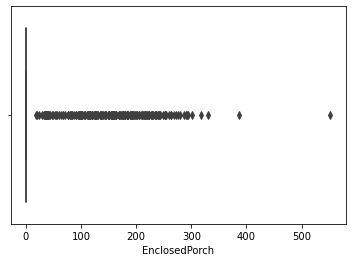

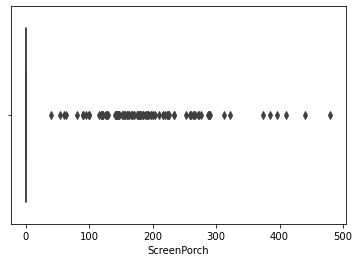

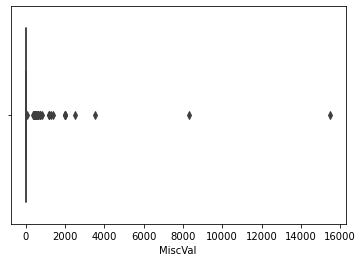

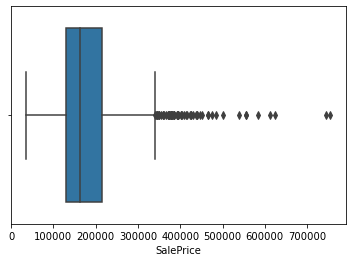

In [70]:
for i in cont_fea:
    sns.boxplot(df_cont[i])
    plt.show()

From this we could drop the irrugular features such as 'MiscVal' ,'ScreenPorch','EnclosedPorch','BsmtFinSF2'
Their corelation is also almost zero

In [71]:
cont_fea=[i for i in cont_fea if i not in ['MiscVal' ,'ScreenPorch','EnclosedPorch','BsmtFinSF2']]
df_cont.drop(['MiscVal' ,'ScreenPorch','EnclosedPorch','BsmtFinSF2'],axis=1,inplace=True)
combined_df.drop(['MiscVal' ,'ScreenPorch','EnclosedPorch','BsmtFinSF2'],axis=1,inplace=True)

#### Histogram and scatterplot (with SalePrice) of each continuous Feature

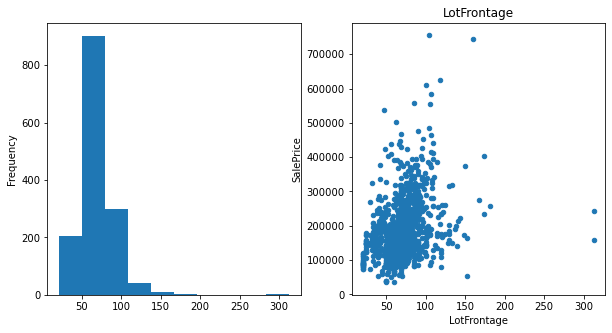

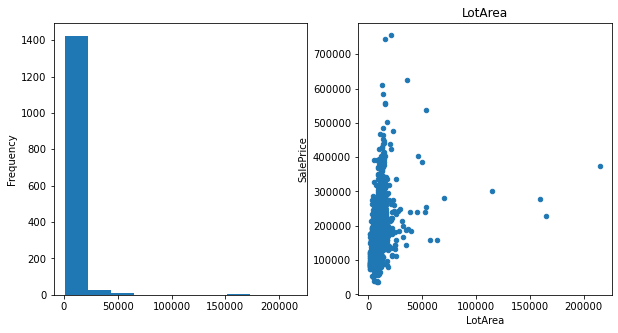

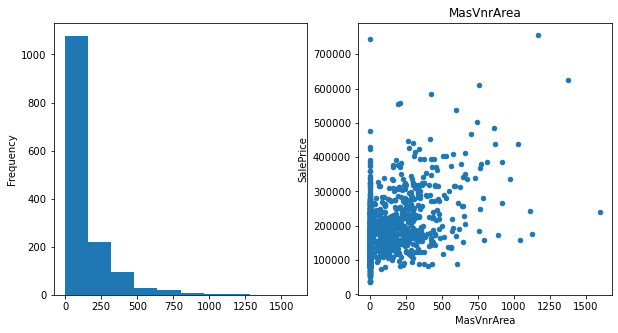

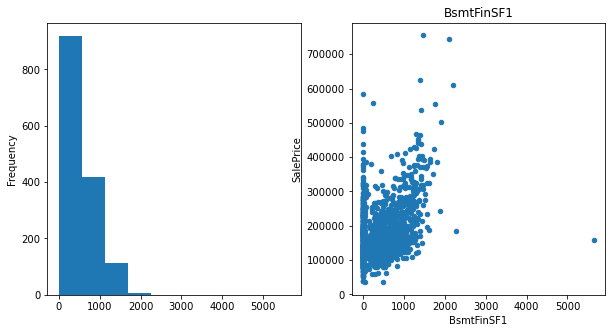

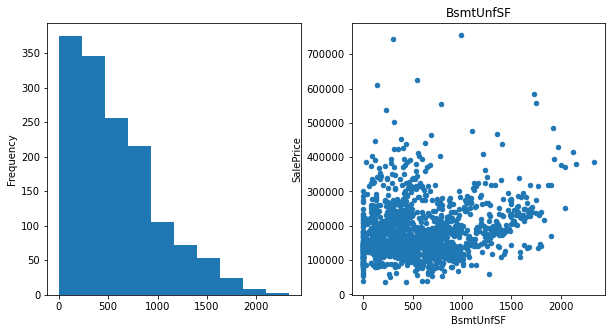

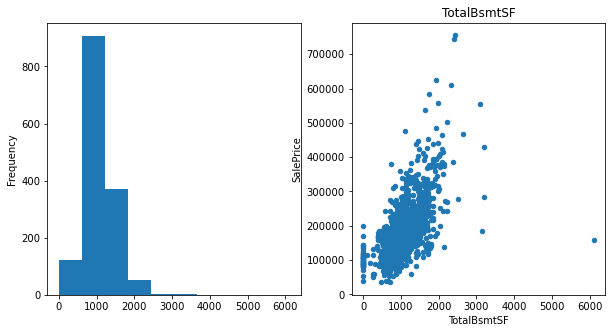

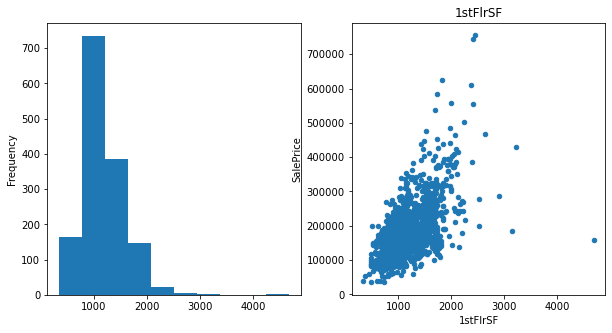

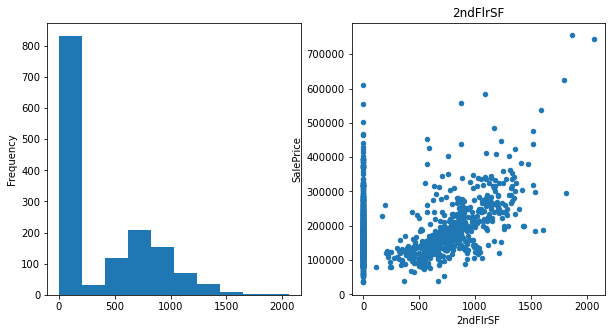

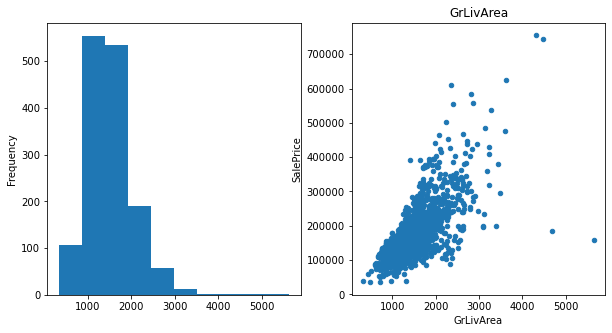

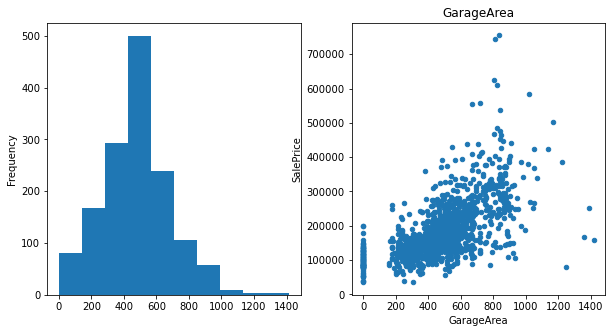

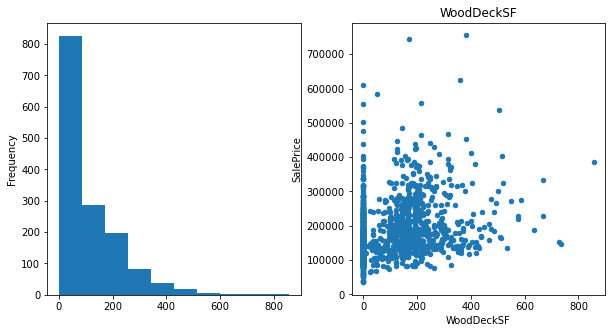

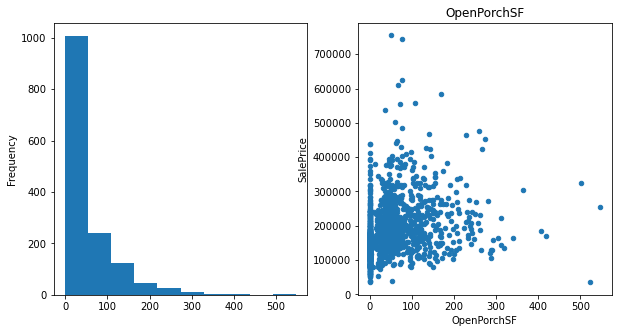

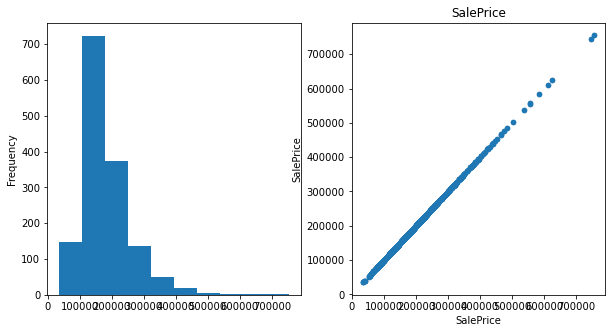

In [72]:
for i in cont_fea:
    
    fig=plt.figure(figsize=(10,5))
    ax0=fig.add_subplot(1,2,1)
    ax1=fig.add_subplot(1,2,2)
   
    df_cont[i].plot(kind='hist',ax=ax0)
    
    df_cont[[i,'SalePrice']].plot(kind='scatter',x=i,y='SalePrice',ax=ax1)
    plt.title(i)
    

 Most of the data is skewed so we must make them to gaussian distribution

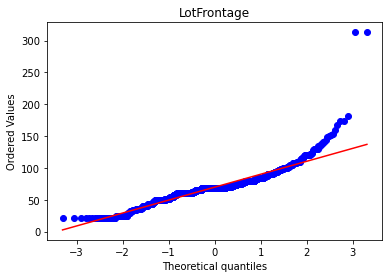

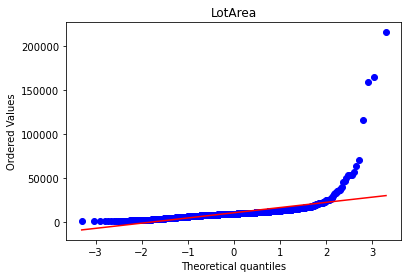

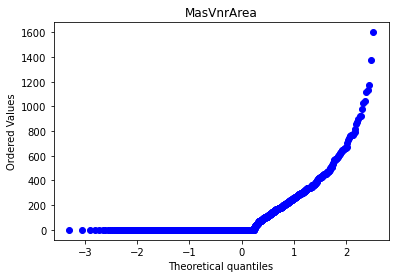

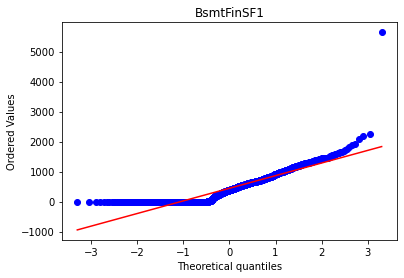

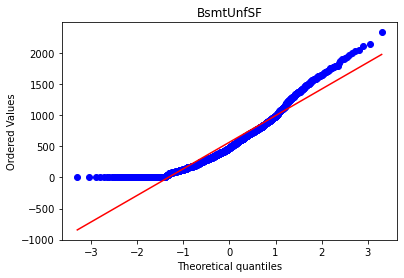

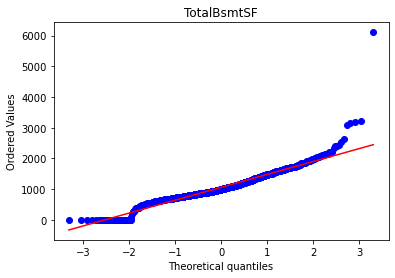

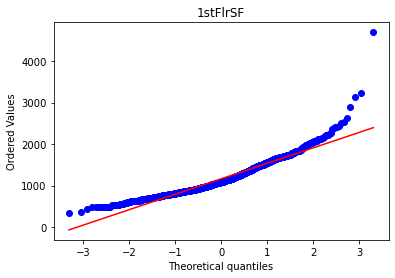

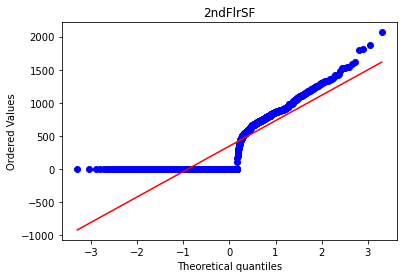

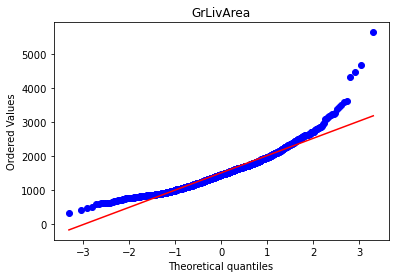

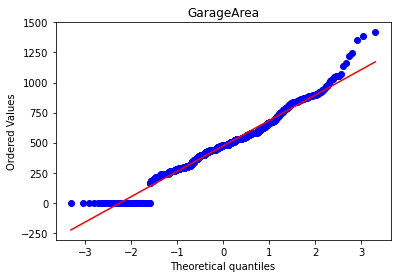

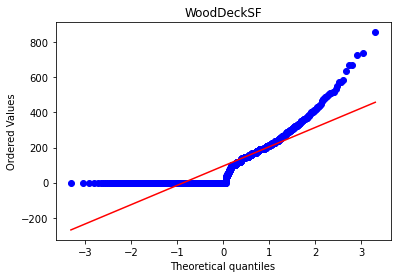

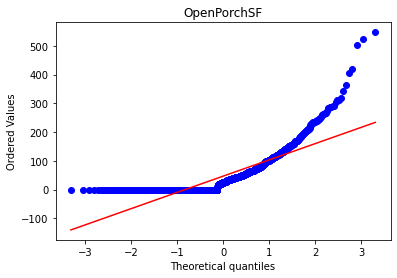

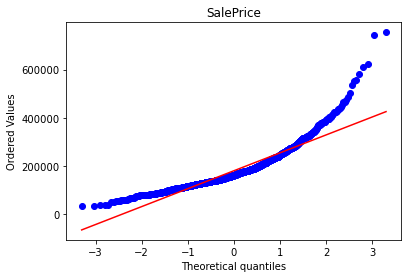

In [73]:
import scipy.stats as stat
import pylab
for i in cont_fea:
    plt.figure()
    stat.probplot(df_cont[i],dist="norm",plot=pylab)
    plt.title(i)
    plt.show()


we have to choose which transformation is best among log transform, boxcox

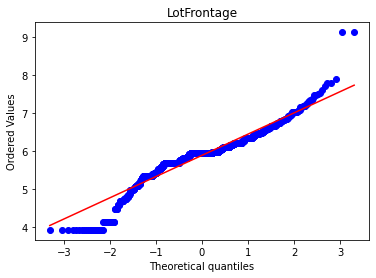

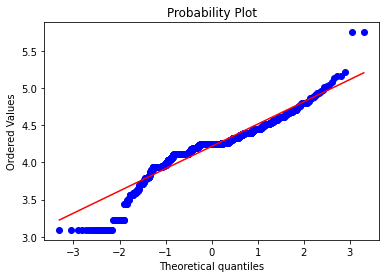

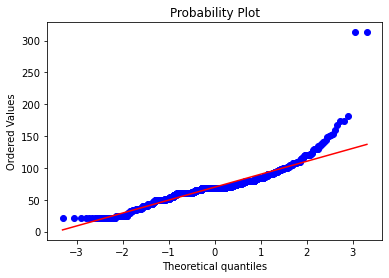

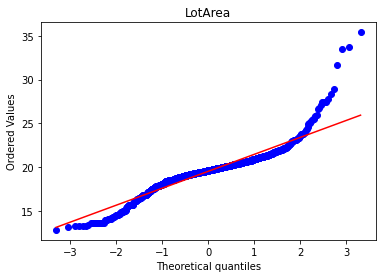

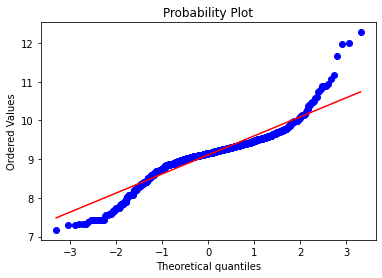

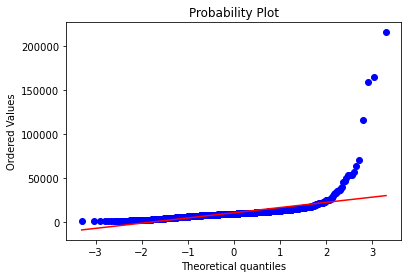

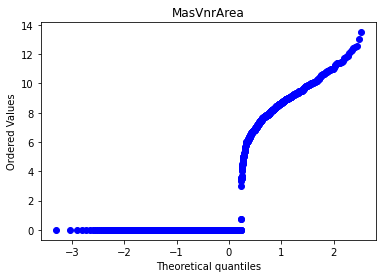

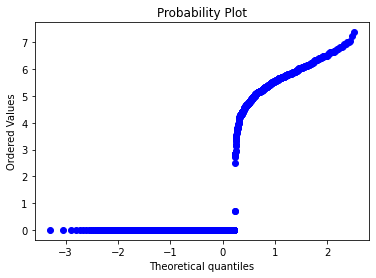

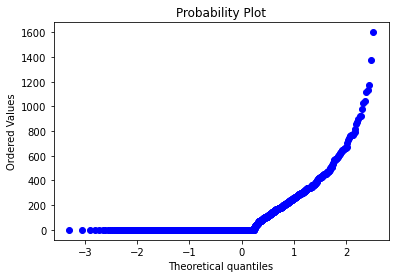

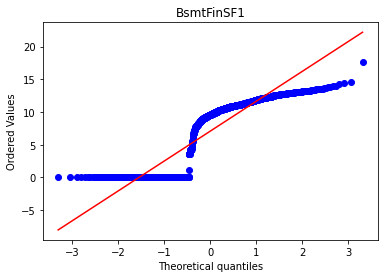

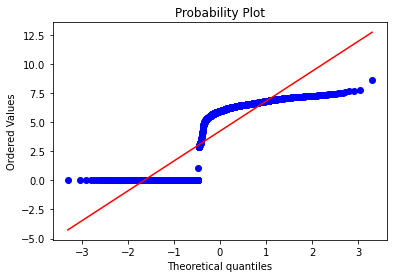

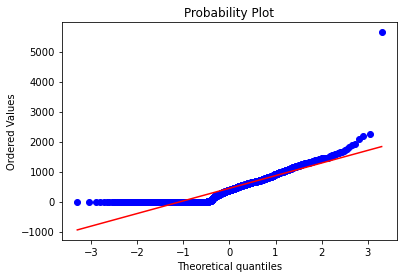

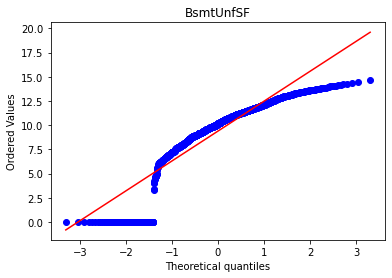

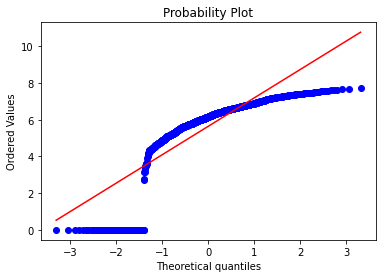

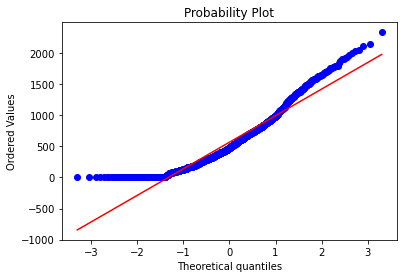

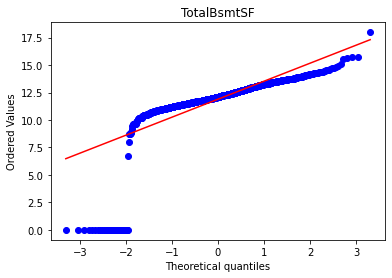

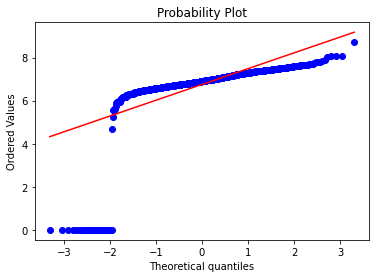

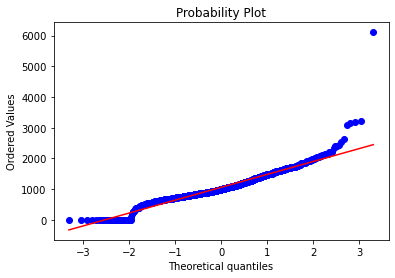

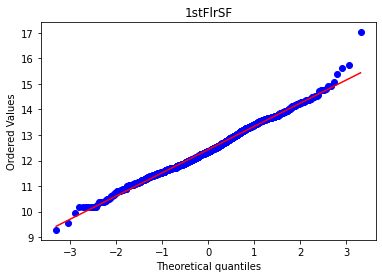

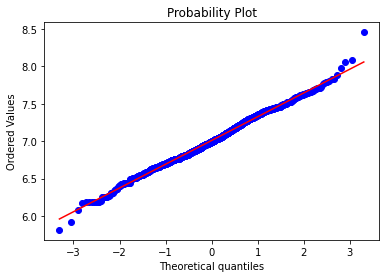

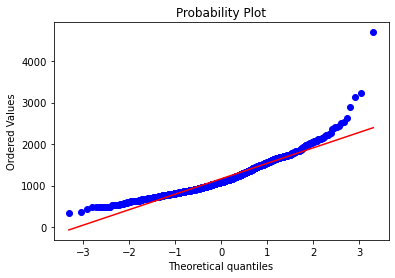

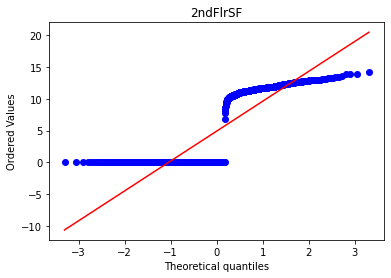

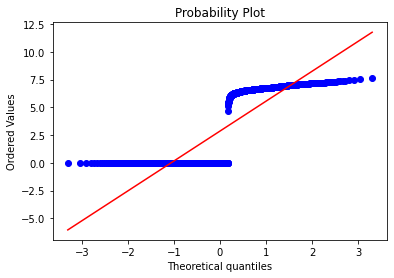

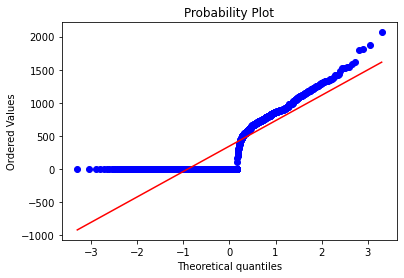

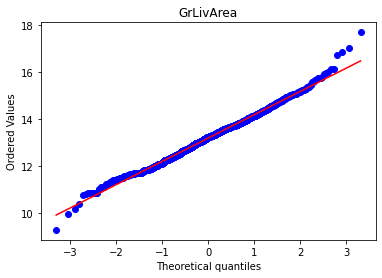

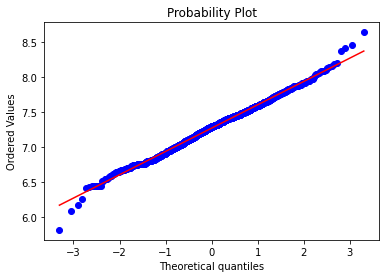

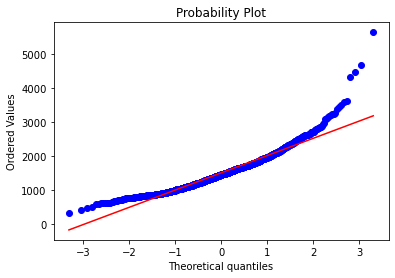

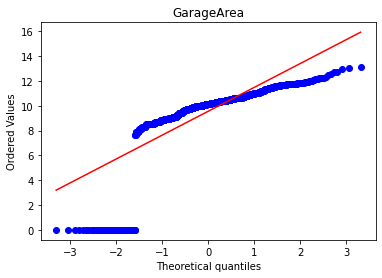

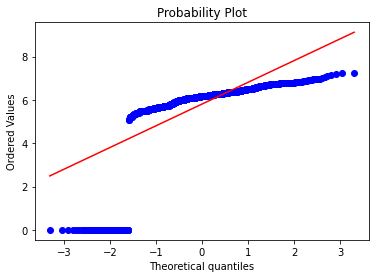

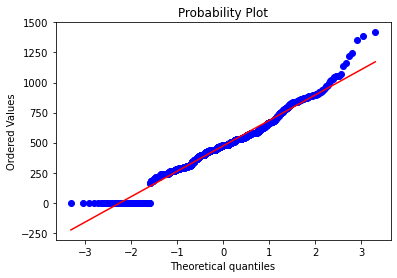

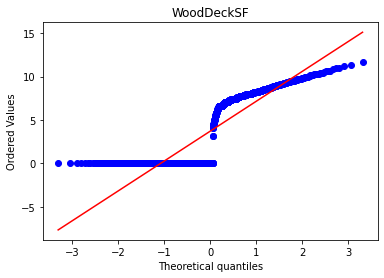

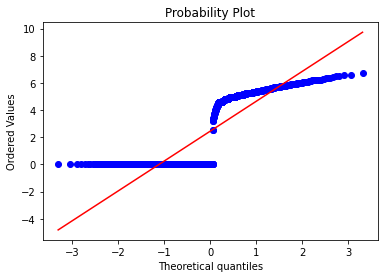

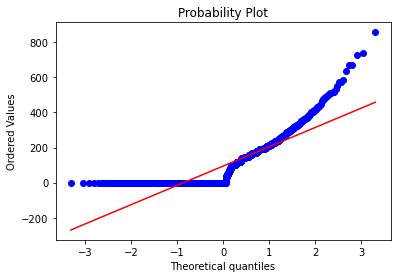

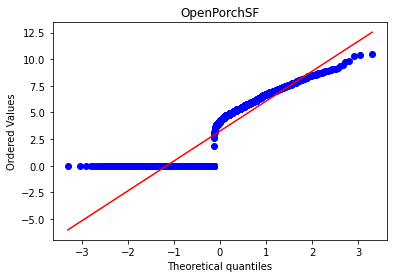

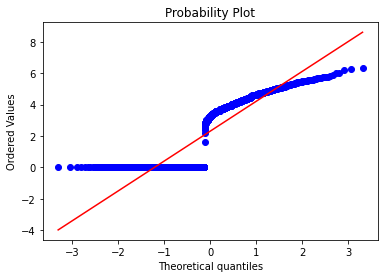

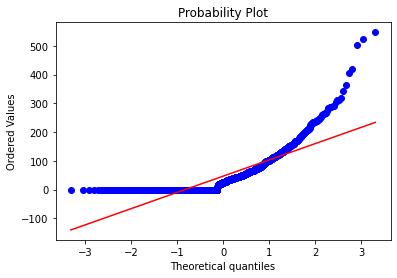

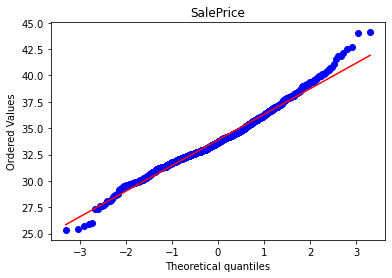

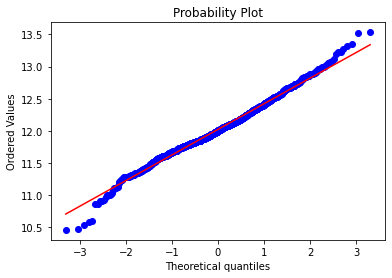

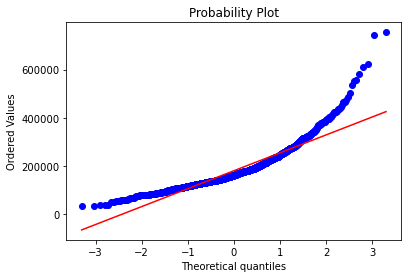

In [74]:
#checking which plot is better
import scipy.stats as stat
from scipy.special import boxcox1p
lam = 0.15
import pylab
box=[]
for i in cont_fea:
    
    
    stat.probplot(boxcox1p(df_cont[i],lam),dist="norm",plot=pylab)
    plt.title(i)
    plt.show()
    stat.probplot(np.log1p(df_cont[i]),dist="norm",plot=pylab)
    
    plt.show()
    stat.probplot(df_cont[i],dist="norm",plot=pylab)
    plt.show()
    box.append(i)
  

Now we found that except 'BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','2ndFlrSF','GarageArea' all others are skewed, and log transform plays better.

In [75]:
for i in cont_fea:
    if i not in ['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','2ndFlrSF','GarageArea']:
        df_cont[i]=np.log1p(df_cont[i])
        combined_df[i]=np.log1p(combined_df[i])

Note that we have also transformed SalePrice which must be transformed back after prediction

In [76]:
df_cont.corr()['SalePrice']


LotFrontage    0.346237
LotArea        0.399923
MasVnrArea     0.418659
BsmtFinSF1     0.372023
BsmtUnfSF      0.221985
TotalBsmtSF    0.612134
1stFlrSF       0.608955
2ndFlrSF       0.319300
GrLivArea      0.730254
GarageArea     0.650888
WoodDeckSF     0.343039
OpenPorchSF    0.459948
SalePrice      1.000000
Name: SalePrice, dtype: float64

### Final data


In [77]:
combined_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,PoolArea,YrSold,SaleType,SaleCondition,SalePrice,MasVnrType_missing,BsmtQual_missing,BsmtCond_missing,BsmtExposure_missing,BsmtFinType1_missing,BsmtFinType2_missing,GarageType_missing,GarageFinish_missing,GarageQual_missing,GarageCond_missing,garage,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,LowQualFinSF_new,3SsnPorch_new,PoolArea_new,bathroom
0,13,3,4.189655,9.042040,1,0,1,1,0,0,5,3,2,1,3,7,9,2003,2003,1,1,11,3,2,5.283204,2,4,4,2,2,0,3,706.0,3,150.0,856.0,5,4,1,5,6.753438,854,0,7.444833,2,8,2,0,4,2003.000000,1,2.0,548.0,3,4,2,0.000000,4.127134,0,0,2008,2,1,12.247699,0,0,0,0,0,0,0,0,0,0,0,5,5,5.000000,0,0,0,3
1,9,3,4.394449,9.169623,1,0,1,1,0,0,6,1,2,1,2,6,5,1976,1976,1,1,6,1,1,0.000000,1,4,2,2,2,3,1,978.0,3,284.0,1262.0,5,4,1,5,7.141245,0,0,7.141245,1,6,2,1,4,1976.000000,1,2.0,460.0,3,4,2,5.700444,0.000000,0,0,2007,2,1,12.109016,0,0,0,0,0,0,0,0,0,0,0,31,31,31.000000,0,0,0,2
2,13,3,4.234107,9.328212,1,1,1,1,0,0,5,3,2,1,3,7,9,2001,2002,1,1,11,3,2,5.093750,2,4,4,2,2,1,3,486.0,3,434.0,920.0,5,4,1,5,6.825460,866,0,7.488294,2,6,2,1,4,2001.000000,1,2.0,608.0,3,4,2,0.000000,3.761200,0,0,2008,2,1,12.317171,0,0,0,0,0,0,0,0,0,0,0,7,6,7.000000,0,0,0,3
3,8,3,4.110874,9.164401,1,1,1,1,0,0,5,3,2,1,3,7,9,1915,1970,1,1,5,1,1,0.000000,1,4,1,1,3,0,1,216.0,3,540.0,756.0,5,3,1,5,6.869014,756,0,7.448916,2,7,2,1,1,1998.000000,0,3.0,642.0,3,4,2,0.000000,3.583519,0,0,2006,2,1,11.849405,0,0,0,0,0,0,0,0,0,0,0,91,36,8.000000,0,0,0,0
4,13,3,4.442651,9.565284,1,1,1,1,0,0,8,3,2,1,3,8,9,2000,2000,1,1,11,3,2,5.860786,2,4,4,2,2,2,3,655.0,3,490.0,1145.0,5,4,1,5,7.044033,1053,0,7.695758,2,9,2,1,4,2000.000000,1,3.0,836.0,3,4,2,5.262690,4.442651,0,0,2008,2,1,12.429220,0,0,0,0,0,0,0,0,0,0,0,8,8,8.000000,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,7,1,3.091042,7.568896,1,0,1,1,0,0,0,3,2,0,3,4,7,1970,1970,1,1,12,4,1,0.000000,1,4,2,1,2,0,1,0.0,3,546.0,546.0,5,3,1,5,6.304449,546,0,6.996681,1,5,2,0,4,1978.113406,0,0.0,0.0,3,4,2,0.000000,0.000000,0,0,2006,2,1,NaN,0,0,0,0,0,0,1,1,1,1,1,36,36,27.886594,0,0,0,2
2915,7,1,3.091042,7.546974,1,0,1,1,0,0,0,3,2,1,3,4,9,1970,1970,1,1,12,4,1,0.000000,1,4,2,1,2,0,0,252.0,3,294.0,546.0,5,2,1,5,6.304449,546,0,6.996681,1,6,2,0,0,1970.000000,0,1.0,286.0,3,4,2,0.000000,3.218876,0,0,2006,2,1,NaN,0,0,0,0,0,0,0,0,0,0,0,36,36,36.000000,0,0,0,2
2916,9,3,5.081404,9.903538,1,0,1,1,0,0,3,3,2,1,2,5,7,1960,1996,1,1,11,3,1,0.000000,1,4,2,1,2,0,1,1224.0,3,0.0,1224.0,5,4,1,5,7.110696,0,0,7.110696,1,7,2,1,1,1960.000000,0,2.0,576.0,3,4,2,6.163315,0.000000,0,0,2006,2,1,NaN,0,0,0,0,0,0,0,0,0,0,0,46,10,46.000000,0,0,0,0
2917,6,3,4.143135,9.253591,1,0,1,1,0,0,3,3,2,1,1,5,9,1992,1992,1,1,8,1,1,0.000000,1,4,4,2,2,2,3,337.0,3,575.0,912.0,5,2,1,5,6.878326,0,0,6.878326,1,6,2,0,4,1978.113406,0,0.0,0.0,3,4,2,4.394449,3.496508,0,0,2006,2,1,NaN,0,0,0,0,0,0,1,1,1,1,1,14,14,27.886594,0,0,0,0


Filling the Null Values in combined_df

In [78]:
combined_df.isnull().sum().to_frame()

,0
MSSubClass,0
MSZoning,0
LotFrontage,486
LotArea,0
Street,0
...,...
GarageYrBlt_age,0
LowQualFinSF_new,0
3SsnPorch_new,0
PoolArea_new,0


In [79]:
#Lot frontage is non-skewed data, but others are wkewed data so we use mean and mode respectively
combined_df['LotFrontage'].fillna(combined_df['LotFrontage'].mean(),inplace=True)
combined_df['MasVnrArea'].fillna(combined_df['MasVnrArea'].median(),inplace=True)
combined_df['BsmtFinSF1'].fillna(combined_df['BsmtFinSF1'].median(),inplace=True)
combined_df['BsmtUnfSF'].fillna(combined_df['BsmtUnfSF'].median(),inplace=True)
combined_df['TotalBsmtSF'].fillna(combined_df['TotalBsmtSF'].median(),inplace=True)
combined_df['GarageArea'].fillna(combined_df['GarageArea'].median(),inplace=True)

In [80]:
new_combined=combined_df

In [81]:
#only the saleprice feature has null
combined_df.isnull().sum().sum()

1459

_____

## One hot encoding of categorical features

In [82]:
#creating dummy var
finalt_df=combined_df[:1460].copy()

In [83]:
#getting non continuous features
caty_cols=[]
for i in finalt_df.columns:
    if finalt_df[i].nunique()<=25 and finalt_df[i].nunique()>2:
        caty_cols.append(i)

we could visualize the categories and decide whether to implement one hot- encoding or not.

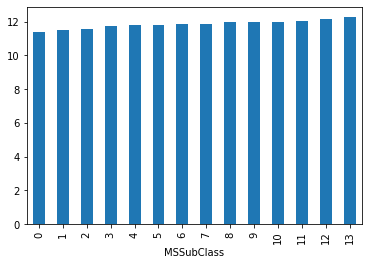

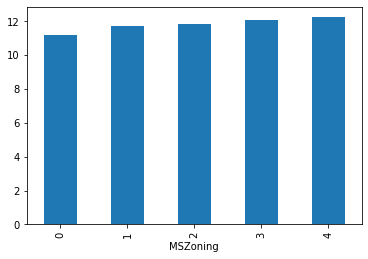

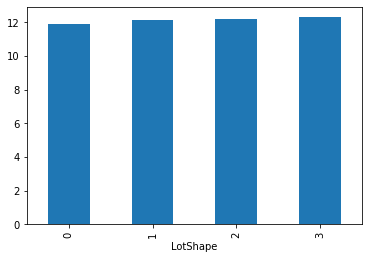

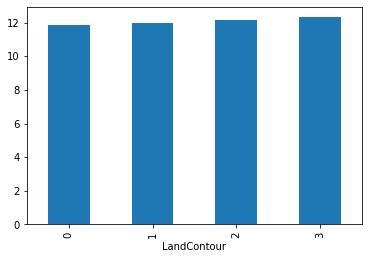

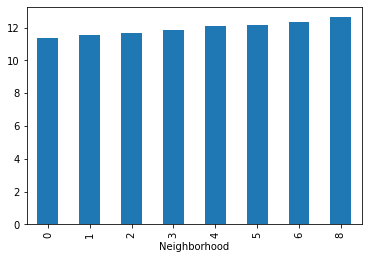

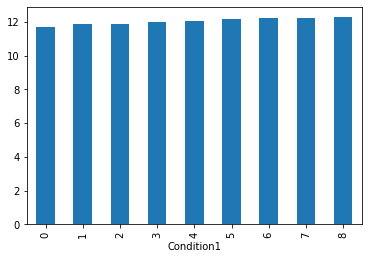

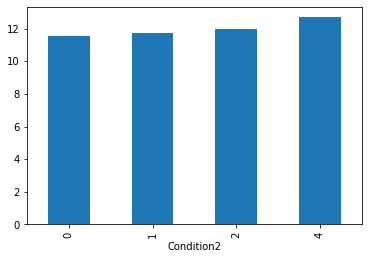

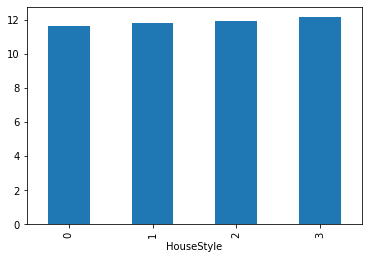

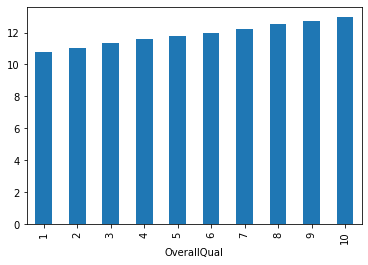

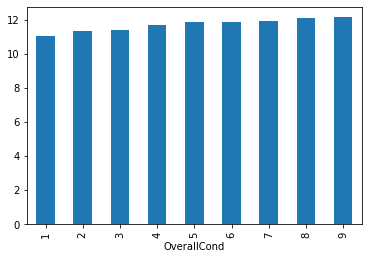

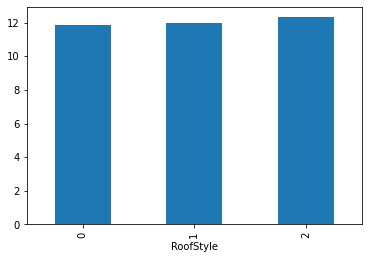

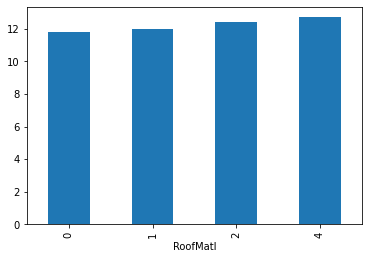

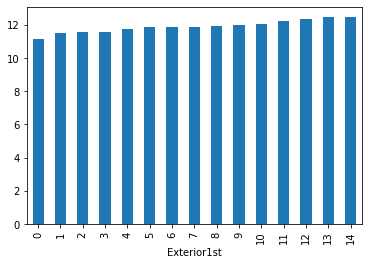

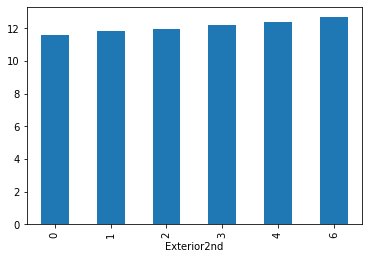

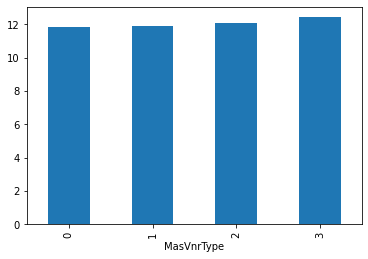

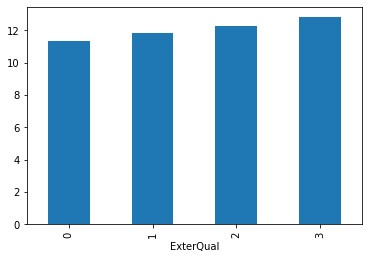

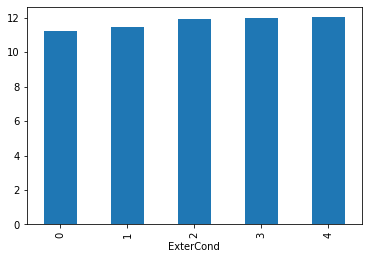

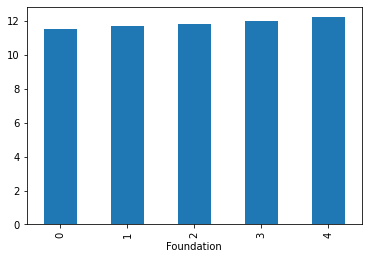

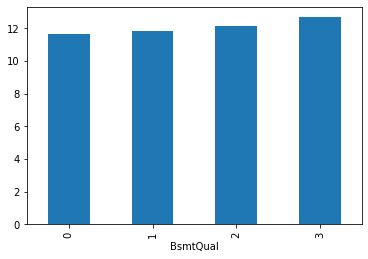

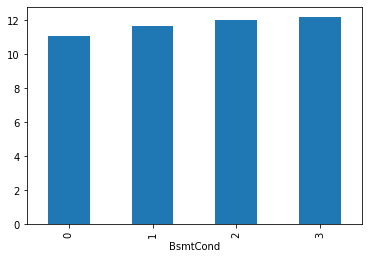

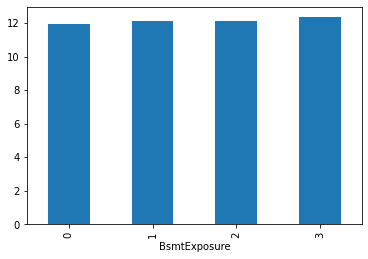

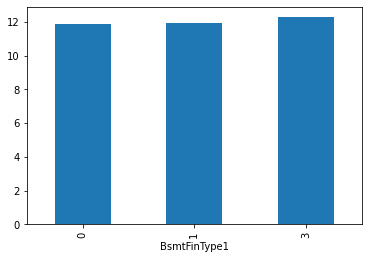

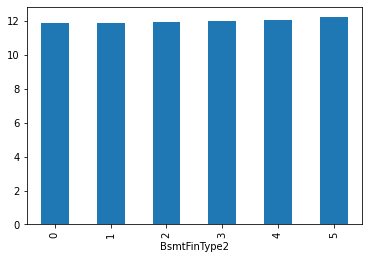

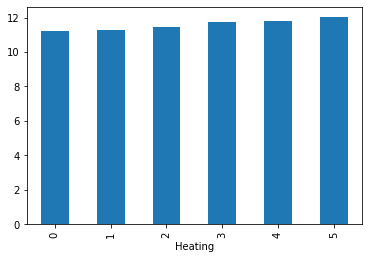

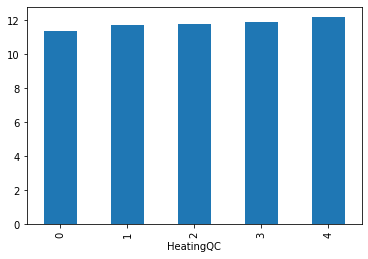

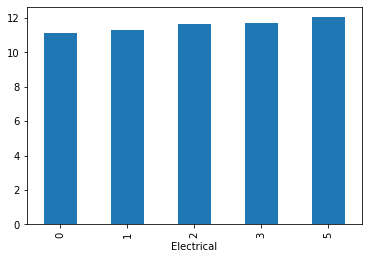

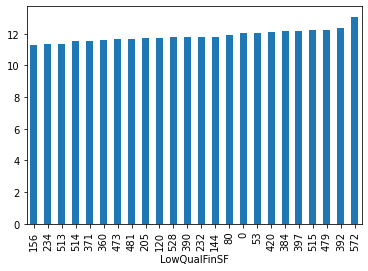

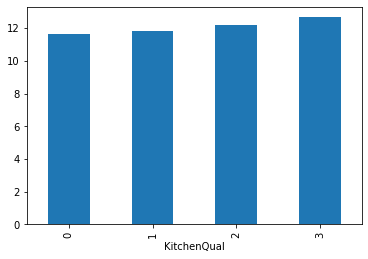

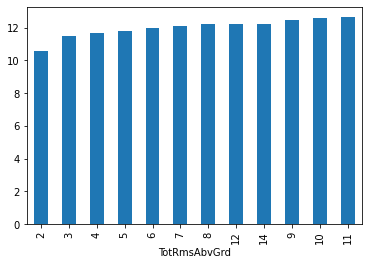

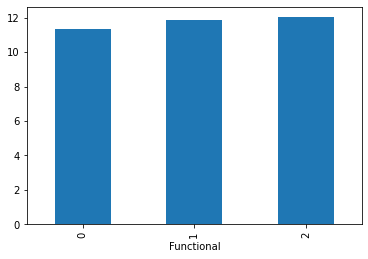

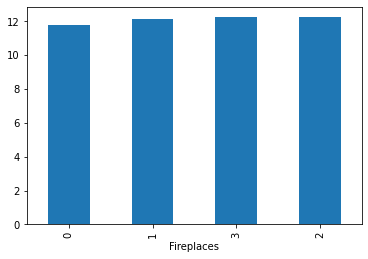

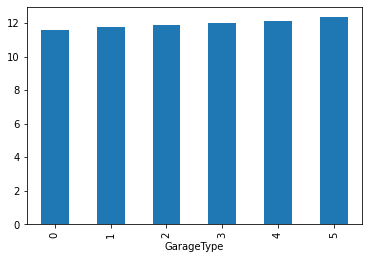

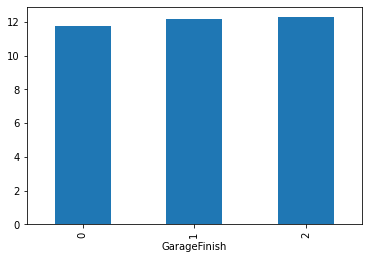

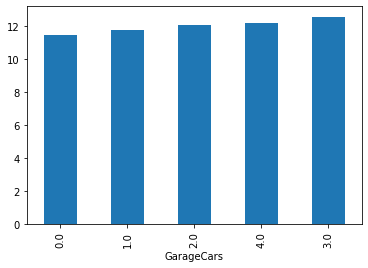

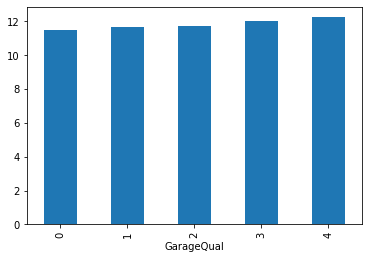

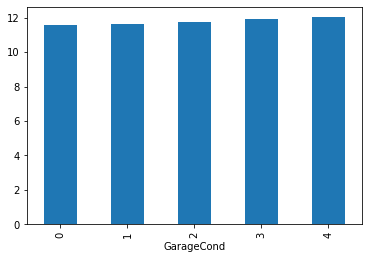

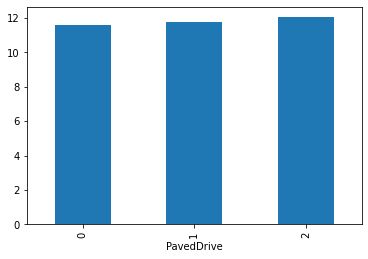

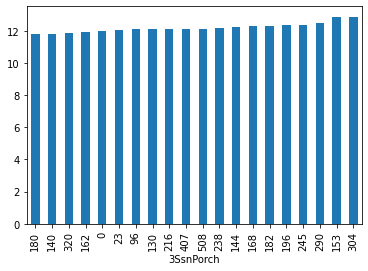

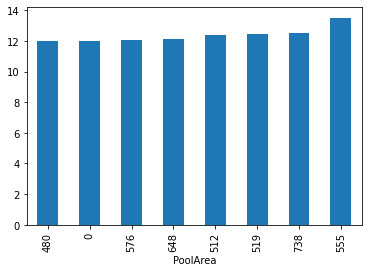

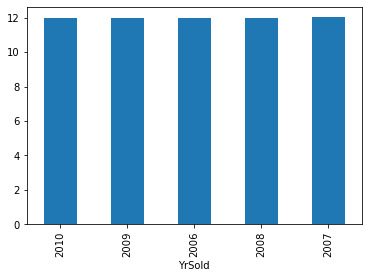

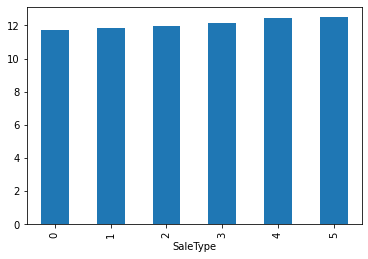

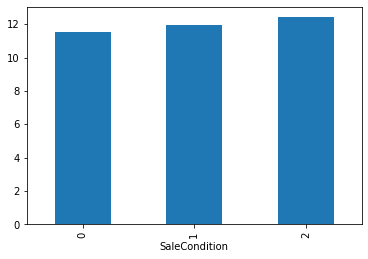

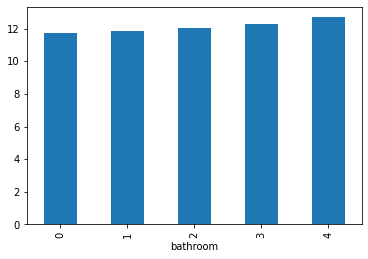

In [84]:
for i in caty_cols:
    finalt_df.groupby(i)['SalePrice'].median().sort_values().plot.bar()
    plt.show()

From the above analysis we need ['Condition2','OverallCond','ExterCond','ExterQual','MasVnrType','Foundation','BsmtCond','BsmtFinType1',
 'Electrical','LowQualFinSF','GarageCars','3SsnPorch','SaleCondition'] these to encode onehot

In [85]:
to_onehot=['Condition2','OverallCond','ExterCond','ExterQual','MasVnrType','Foundation','BsmtCond','BsmtFinType1',
 'Electrical','LowQualFinSF','GarageCars','3SsnPorch','SaleCondition']

In [86]:
finalt_df=pd.get_dummies(finalt_df,columns=to_onehot)

In [87]:
combined_df=pd.get_dummies(combined_df,columns=to_onehot)

In [88]:
combined_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,YrSold,SaleType,SalePrice,MasVnrType_missing,BsmtQual_missing,BsmtCond_missing,BsmtExposure_missing,BsmtFinType1_missing,BsmtFinType2_missing,GarageType_missing,GarageFinish_missing,GarageQual_missing,GarageCond_missing,garage,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,LowQualFinSF_new,3SsnPorch_new,PoolArea_new,bathroom,Condition2_0,Condition2_1,Condition2_2,Condition2_4,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,ExterCond_0,ExterCond_1,ExterCond_2,ExterCond_3,ExterCond_4,ExterQual_0,ExterQual_1,ExterQual_2,ExterQual_3,MasVnrType_0,MasVnrType_1,MasVnrType_2,MasVnrType_3,Foundation_0,Foundation_1,Foundation_2,Foundation_3,Foundation_4,BsmtCond_0,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_3,Electrical_0,Electrical_1,Electrical_2,Electrical_3,Electrical_5,LowQualFinSF_0,LowQualFinSF_53,LowQualFinSF_80,LowQualFinSF_108,LowQualFinSF_114,LowQualFinSF_120,LowQualFinSF_140,LowQualFinSF_144,LowQualFinSF_156,LowQualFinSF_205,LowQualFinSF_232,LowQualFinSF_234,LowQualFinSF_259,LowQualFinSF_312,LowQualFinSF_360,LowQualFinSF_362,LowQualFinSF_371,LowQualFinSF_384,LowQualFinSF_390,LowQualFinSF_392,LowQualFinSF_397,LowQualFinSF_420,LowQualFinSF_431,LowQualFinSF_436,LowQualFinSF_450,LowQualFinSF_473,LowQualFinSF_479,LowQualFinSF_481,LowQualFinSF_512,LowQualFinSF_513,LowQualFinSF_514,LowQualFinSF_515,LowQualFinSF_528,LowQualFinSF_572,LowQualFinSF_697,LowQualFinSF_1064,GarageCars_0.0,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,3SsnPorch_0,3SsnPorch_23,3SsnPorch_86,3SsnPorch_96,3SsnPorch_120,3SsnPorch_130,3SsnPorch_140,3SsnPorch_144,3SsnPorch_150,3SsnPorch_153,3SsnPorch_162,3SsnPorch_168,3SsnPorch_174,3SsnPorch_176,3SsnPorch_180,3SsnPorch_182,3SsnPorch_196,3SsnPorch_216,3SsnPorch_219,3SsnPorch_224,3SsnPorch_225,3SsnPorch_238,3SsnPorch_245,3SsnPorch_255,3SsnPorch_290,3SsnPorch_304,3SsnPorch_320,3SsnPorch_323,3SsnPorch_360,3SsnPorch_407,3SsnPorch_508,SaleCondition_0,SaleCondition_1,SaleCondition_2
0,13,3,4.189655,9.042040,1,0,1,1,0,0,5,3,1,3,7,2003,2003,1,1,11,3,5.283204,2,0,706.0,3,150.0,856.0,5,4,1,6.753438,854,7.444833,2,8,2,0,4,2003.000000,1,548.0,3,4,2,0.000000,4.127134,0,2008,2,12.247699,0,0,0,0,0,0,0,0,0,0,0,5,5,5.000000,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,9,3,4.394449,9.169623,1,0,1,1,0,0,6,1,1,2,6,1976,1976,1,1,6,1,0.000000,2,3,978.0,3,284.0,1262.0,5,4,1,7.141245,0,7.141245,1,6,2,1,4,1976.000000,1,460.0,3,4,2,5.700444,0.000000,0,2007,2,12.109016,0,0,0,0,0,0,0,0,0,0,0,31,31,31.000000,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,13,3,4.234107,9.328212,1,1,1,1,0,0,5,3,1,3,7,2001,2002,1,1,11,3,5.093750,2,1,486.0,3,434.0,920.0,5,4,1,6.825460,866,7.488294,2,6,2,1,4,2001.000000,1,608.0,3,4,2,0.000000,3.761200,0,2008,2,12.317171,0,0,0,0,0,0,0,0,0,0,0,7,6,7.000000,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

___



## Feature Selection

Selecting just the useful Features by SelectFromModel using Lasso Regression

In [89]:
X= combined_df.loc[:1459,combined_df.drop('SalePrice',axis=1).columns]
y=np.expm1(combined_df.loc[:1459,'SalePrice'])
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


feature_sel_model = SelectFromModel(Lasso(alpha=60, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,  True, False,  True, False, False, False,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False,  True,  True, False,  True, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [90]:
X_new=X.loc[:,X.columns[feature_sel_model.get_support()]]
X_new

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,YrSold,SaleType,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,3SsnPorch_new,bathroom,Condition2_4,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_7,OverallCond_8,OverallCond_9,ExterCond_1,ExterCond_2,ExterCond_3,ExterQual_0,ExterQual_1,ExterQual_2,ExterQual_3,MasVnrType_1,MasVnrType_2,Foundation_0,Foundation_1,BsmtCond_1,BsmtCond_2,BsmtFinType1_0,BsmtFinType1_3,Electrical_5,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,3SsnPorch_0
0,13,3,4.189655,9.042040,1,0,1,0,0,5,3,1,3,7,2003,2003,1,11,3,5.283204,2,0,706.0,3,150.0,856.0,5,4,1,6.753438,854,7.444833,2,8,2,0,4,2003.0,1,548.0,3,4,2,0.000000,4.127134,0,2008,2,5,5,5.0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,1
1,9,3,4.394449,9.169623,1,0,1,0,0,6,1,1,2,6,1976,1976,1,6,1,0.000000,2,3,978.0,3,284.0,1262.0,5,4,1,7.141245,0,7.141245,1,6,2,1,4,1976.0,1,460.0,3,4,2,5.700444,0.000000,0,2007,2,31,31,31.0,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1
2,13,3,4.234107,9.328212,1,1,1,0,0,5,3,1,3,7,2001,2002,1,11,3,5.093750,2,1,486.0,3,434.0,920.0,5,4,1,6.825460,866,7.488294,2,6,2,1,4,2001.0,1,608.0,3,4,2,0.000000,3.761200,0,2008,2,7,6,7.0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,1
3,8,3,4.110874,9.164401,1,1,1,0,0,5,3,1,3,7,1915,1970,1,5,1,0.000000,1,0,216.0,3,540.0,756.0,5,3,1,6.869014,756,7.448916,2,7,2,1,1,1998.0,0,642.0,3,4,2,0.000000,3.583519,0,2006,2,91,36,8.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1
4,13,3,4.442651,9.565284,1,1,1,0,0,8,3,1,3,8,2000,2000,1,11,3,5.860786,2,2,655.0,3,490.0,1145.0,5,4,1,7.044033,1053,7.695758,2,9,2,1,4,2000.0,1,836.0,3,4,2,5.262690,4.442651,0,2008,2,8,8,8.0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,13,3,4.143135,8.976894,1,0,1,0,0,4,3,1,3,6,1999,2000,1,11,3,0.000000,2,0,0.0,3,953.0,953.0,5,4,1,6.860664,694,7.407318,1,7,2,1,4,1999.0,1,460.0,3,4,2,0.000000,3.713572,0,2007,2,8,7,8.0,0,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1
1456,9,3,4.454347,9.486152,1,0,1,0,0,4,3,1,2,6,1978,1988,1,10,2,4.787492,2,0,790.0,1,589.0,1542.0,5,2,1,7.637234,0,7.637234,1,7,1,2,4,1978.0,0,500.0,3,4,2,5.857933,0.000000,0,2010,2,32,22,32.0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
1457,8,3,4.204693,9.109746,1,0,1,0,0,5,3,1,3,7,1941,2006,1,12,4,0.000000,1,0,275.0,3,877.0,1152.0,5,4,1,7.080868,1152,7.758333,2,9,2,2,4,1941.0,1,252.0,3,4,2,0.000000,4.110874,0,2010,2,69,4,69.0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1
1458,9,3,4.234107,9.181735,1,0,1,0,0,3,3,1,2,5,1950,1996,1,6,1,0.000000,1,1,49.0,1,0.0,1078.0,5,3,1,6.983790,0,6.983790,2,5,2,0,4,1950.0,0,240.0,3,4,2,5.905362,0.000000,0,2010,2,60,14,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1


# Modeling

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,mean_absolute_error
X_train,X_test,y_train,y_test=train_test_split(X_new,combined_df.loc[:1459,'SalePrice']
                                               ,random_state=1)

## Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression

#X= combined_df.loc[:1459,combined_df.drop('SalePrice',axis=1).columns]
#y=combined_df.loc[:1459,'SalePrice']
#X_train,X_test,y_train,y_test=train_test_split(X_new,y,random_state=1)

lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
r2_score(np.expm1(lr_pred),np.expm1(y_test))
print("r2- ",r2_score(np.expm1(lr_pred),np.expm1(y_test)))
print("msle- ",mean_squared_log_error(np.expm1(lr_pred),np.expm1(y_test)))
print("mae- ",mean_absolute_error(np.expm1(lr_pred),np.expm1(y_test)))
print("mse- ",np.sqrt(mean_squared_error(np.expm1(lr_pred),np.expm1(y_test))))

r2-  0.8851493632826892
msle-  0.01586125333916706
mae-  15195.335003723225
mse-  25058.48886754751


## Lasso 


In [93]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=60)

ls.fit(X_train,y_train)
ls_pred=lr.predict(X_test)
r2_score(np.expm1(ls_pred),np.expm1(y_test))
print("r2- ",r2_score(np.expm1(ls_pred),np.expm1(y_test)))
print("msle- ",mean_squared_log_error(np.expm1(ls_pred),np.expm1(y_test)))
print("mae- ",mean_absolute_error(np.expm1(ls_pred),np.expm1(y_test)))

r2-  0.8851493632826892
msle-  0.01586125333916706
mae-  15195.335003723225


# Lasso CV

In [94]:
from sklearn.model_selection import KFold 
from sklearn.linear_model import LassoCV

kfolds = KFold(n_splits=10, shuffle=True, random_state=10)
lcv=LassoCV(alphas=[0.0000000000005,0.00005,0.0005,0.005,0.05,0.5,5,50,60],cv=kfolds)

lcv.fit(X_train,y_train)
lcv_pred=lr.predict(X_test)
r2_score(np.expm1(lcv_pred),np.expm1(y_test))
print("r2- ",r2_score(np.expm1(lcv_pred),np.expm1(y_test)))
print("msle- ",mean_squared_log_error(np.expm1(lcv_pred),np.expm1(y_test)))
print("mae- ",mean_absolute_error(np.expm1(lcv_pred),np.expm1(y_test)))

r2-  0.8851493632826892
msle-  0.01586125333916706
mae-  15195.335003723225


# SVM

In [95]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)
print("r2- ",r2_score(np.expm1(svr_pred),np.expm1(y_test)))
print("msle- ",mean_squared_log_error(np.expm1(svr_pred),np.expm1(y_test)))
print("mae- ",mean_absolute_error(np.expm1(svr_pred),np.expm1(y_test)))

r2-  0.7589190502029247
msle-  0.03572964636457698
mae-  22638.188777069252


## DecisionTreeRegressor

In [96]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_pred=dtr.predict(X_test)
r2_score(np.expm1(dtr_pred),np.expm1(y_test))
print("r2- ",r2_score(np.expm1(dtr_pred),np.expm1(y_test)))
print("msle- ",mean_squared_log_error(np.expm1(dtr_pred),np.expm1(y_test)))
print("mae- ",mean_absolute_error(np.expm1(dtr_pred),np.expm1(y_test)))

r2-  0.8054047479539347
msle-  0.04107037042547317
mae-  25000.216438356165


## RandomForestRegressor

In [97]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_pred=rfr.predict(X_test)
r2_score(np.expm1(rfr_pred),np.expm1(y_test))
print("r2- ",r2_score(np.expm1(rfr_pred),np.expm1(y_test)))
print("msle- ",mean_squared_log_error(np.expm1(rfr_pred),np.expm1(y_test)))
print("mae- ",mean_absolute_error(np.expm1(rfr_pred),np.expm1(y_test)))

r2-  0.8362720743058091
msle-  0.018732420129522274
mae-  16307.118064185395


## KNeighborsRegressor

In [98]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train,y_train)
knr_pred=knr.predict(X_test)
r2_score(np.expm1(knr_pred),np.expm1(y_test))
print("r2- ",r2_score(np.expm1(knr_pred),np.expm1(y_test)))
print("msle- ",mean_squared_log_error(np.expm1(knr_pred),np.expm1(y_test)))
print("mae- ",mean_absolute_error(np.expm1(knr_pred),np.expm1(y_test)))

r2-  0.5633805595589144
msle-  0.04513266307221424
mae-  26650.22410380056


## XGB

In [99]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train,y_train)
xgb_pred=knr.predict(X_test)
print("r2- ",r2_score(np.expm1(xgb_pred),np.expm1(y_test)))
print("msle- ",mean_squared_log_error(np.expm1(xgb_pred),np.expm1(y_test)))
print("mae- ",mean_absolute_error(np.expm1(xgb_pred),np.expm1(y_test)))

r2-  0.5633805595589144
msle-  0.04513266307221424
mae-  26650.22410380056


### Among the models only Linear Regression and Random Forest Regressors performs well

So we could take these two basic models and other complex models to blend

In [115]:
lr=LinearRegression()
lr.fit(X,y)
ran_model=RandomForestRegressor()
ran_model.fit(X,y)

RandomForestRegressor()

So lets use them and other complex models

Using models - ridge, lasso, elasticnet, svr, grb, lgbm, xgboost

In [101]:
#importing necessary libraries
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import time
SEED = 42

For Cross Validation

In [102]:

kfolds = KFold(n_splits=10, shuffle=True, random_state=SEED)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def evaluate_model_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)


Constructing the models and storing it in a Dictionary 

In [103]:
# model construction
def construct_models():
    alphas_ridge = [0.005, 0.01, 0.1, 1, 5, 10, 15]
    alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
    e_alphas_elas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
    e_l1ratio_elas = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
    
    
    models = dict()
    models['ridge'] = RidgeCV(alphas=alphas_ridge, cv=kfolds)
    models['lasso'] = LassoCV(alphas=alphas_lasso, random_state=SEED, cv=kfolds)
    models['elasticnet'] = ElasticNetCV(alphas=e_alphas_elas, cv=kfolds, l1_ratio=e_l1ratio_elas)
    models['svr'] = SVR()
    models['gbr'] = GradientBoostingRegressor(random_state =SEED) 
    models['lgbm'] = LGBMRegressor()
    models['xgboost'] = XGBRegressor()
    return models


models = construct_models()

training each model

In [104]:

for name, model in models.items():
    start = time.perf_counter()
    
    model = model.fit(np.array(X_train), np.array(y_train))
    rmse_result = rmse(y_train, model.predict(np.array(X_train)))
    print(f'{name}\'s rmse after training: {rmse_result}')
    
    run = time.perf_counter() - start
    print(f'Computational runtime of this algo: {round(run, 2)} seconds\n')

ridge's rmse after training: 0.12155227339364509
Computational runtime of this algo: 0.24 seconds

lasso's rmse after training: 0.1229511669199712
Computational runtime of this algo: 0.84 seconds

elasticnet's rmse after training: 0.12279699500742361
Computational runtime of this algo: 3.74 seconds

svr's rmse after training: 0.193055608260933
Computational runtime of this algo: 0.19 seconds

gbr's rmse after training: 0.08013001661388823
Computational runtime of this algo: 0.78 seconds

lgbm's rmse after training: 0.044201428452532374
Computational runtime of this algo: 0.24 seconds

xgboost's rmse after training: 0.007369091491764105
Computational runtime of this algo: 0.45 seconds



predicting for each model


In [105]:
cv_rmse_result = dict()
cv_rmse_mean = dict()
cv_rmse_std = dict()

for name, model in models.items():
    start = time.perf_counter()
    
    cv_rmse_result[name] = evaluate_model_cv(model, np.array(X_train), np.array(y_train))
    cv_rmse_mean[name] = cv_rmse_result[name].mean()
    cv_rmse_std[name] = cv_rmse_result[name].std()
    print(f'Finish {name}\'s model')
    

    run = time.perf_counter() - start
    print(f'Computational runtime of this algo: {round(run, 2)} seconds\n')

ML_cv = pd.DataFrame({'cv_rsme_mean' : cv_rmse_mean, 'cv_rmse_std' : cv_rmse_std})
ML_cv

Finish ridge's model
Computational runtime of this algo: 2.21 seconds

Finish lasso's model
Computational runtime of this algo: 8.43 seconds

Finish elasticnet's model
Computational runtime of this algo: 37.55 seconds

Finish svr's model
Computational runtime of this algo: 0.76 seconds

Finish gbr's model
Computational runtime of this algo: 7.23 seconds

Finish lgbm's model
Computational runtime of this algo: 2.39 seconds

Finish xgboost's model
Computational runtime of this algo: 3.89 seconds



,cv_rsme_mean,cv_rmse_std
ridge,0.141047,0.045480
lasso,0.140846,0.041449
elasticnet,0.140664,0.041362
svr,0.197102,0.018167
gbr,0.131356,0.016709
lgbm,0.134817,0.019373
xgboost,0.142120,0.017111


## Stack model of all models

In [106]:
stack_model = StackingCVRegressor(regressors=(models['ridge'], models['lasso'], models['xgboost'],
                                              models['elasticnet'], models['gbr'], models['lgbm']),
                                              meta_regressor=models['xgboost'], use_features_in_secondary=True)

start = time.perf_counter()

stack_model = stack_model.fit(np.array(X_train), np.array(y_train))
print('Finish training')


rmse_stack = rmse(y_train, stack_model.predict(np.array(X_train)))
print(f'stack_model\'s rmse (using cv) after training: {rmse_stack}')

run = time.perf_counter() - start
print(f'Computational runtime of this algo: {round(run, 2)} seconds\n')



Finish training
stack_model's rmse (using cv) after training: 0.04743106549301145
Computational runtime of this algo: 36.09 seconds



# Combining Models in a specific ratio (Trial and Error)

Combining - LinearRegression(20%) , Ridge(5%) , Lasso (5%) , Elasticnet (5%) , GBR (5%) ,  LGBM (5%) ,  XGboost (25%) , Stacked model (30%)


In [116]:
def blend_models_predict(X):
    return ((0.2 * lr.predict(np.array(X))) + \
            (0.05 * models['ridge'].predict(np.array(X))) + \
            (0.05 * models['lasso'].predict(np.array(X))) + \
            (0.05 * models['elasticnet'].predict(np.array(X))) + \
            (0.05 * models['gbr'].predict(np.array(X))) + \
            (0.05 * models['lgbm'].predict(np.array(X))) + \
            (0.25 * models['xgboost'].predict(np.array(X))) + \
            (0.3 * stack_model.predict(np.array(X))))

print('RMSLE score on train data:')
print(rmse(y_train, blend_models_predict(np.array(X_train))))

RMSLE score on train data:
0.051489824107405706


# Submission


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X= combined_df.loc[:1459,X_new.columns]
y=combined_df.loc[:1459,'SalePrice']
x_test=combined_df.loc[1460:,X_new.columns]


final=np.expm1(blend_models_predict(np.array(x_test)))


submission=pd.DataFrame()
submission['Id']=test_df['Id']
submission['SalePrice']=final
submission=submission.set_index('Id')
submission.to_csv('submission.csv')

In [118]:
submission

,SalePrice
Id,
1461,120395.549690
1462,162166.167289
1463,184955.674011
1464,192171.913251
1465,190801.883821
...,...
2915,79848.645902
2916,81691.988690
2917,164862.912587
